In [1]:
##### first attempt at opening sylvias data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.io
import h5py 
import statistics as st
from scipy import stats
from astropy.io import ascii
import sys
import imp
import glob
import datetime
from itertools import chain
import subprocess
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [2]:
location =  % pwd
location

'/Users/H/INVERSE/Sylvia_data'

In [3]:
miz_itpv_d150 = scipy.io.loadmat('miz_itpv_d150.mat')
struct = miz_itpv_d150['d150']
# also need the density for waves
sig_2 = struct['sig'][0,1]
sig_3 = struct['sig'][0,2]
sig_4 = struct['sig'][0,3]
# u= struct['vel1'][0,1]
# v= struct['vel2'][0,1]
# uice = struct['uice'][0,1]
# vice = struct['vice'][0,1]
# uocn = struct['u'][0,1]
# vocn = struct['v'][0,1]
# depth = struct['depth'][0,1]
tstart_2 = struct['tstart'][0,1]
tstart_3 = struct['tstart'][0,2]
tstart_4 = struct['tstart'][0,3]
lat_2    = struct['lat'][0,1]
lon_2    = struct['lon'][0,1]
lat_3    = struct['lat'][0,2]
lon_3    = struct['lon'][0,2]
lat_4    = struct['lat'][0,3]
lon_4    = struct['lon'][0,3]

In [4]:
miz_itpv_d5 = h5py.File('miz_itpv_d5more.mat','r')
struct = miz_itpv_d5['d5']
draft   = miz_itpv_d5[struct['draft'][1,0]].value
draft_min = np.sort(draft[draft[:,0]>0.1])[-1]
draft_2 = np.maximum(draft,draft_min)
draft   = miz_itpv_d5[struct['draft'][2,0]].value
draft_min = np.sort(draft[draft[:,0]>0.1])[-1]
draft_first = draft[np.isfinite(draft)][0]
draft_3 = np.maximum(draft,draft_min)
draft_3[np.isnan(draft)]=draft_first
draft_4 = miz_itpv_d5[struct['draft'][3,0]].value

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in maximum
  """
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in maximum
  if __name__ == '__main__':


In [5]:
miz_cdrag = scipy.io.loadmat('miz_cdrag.mat')
struct = miz_cdrag['cdrag']
tuse_cd_2 = struct['tuse'][0,1]
refdepth_2= struct['refdepth'][0,1]
cd6_2     = struct['cd6'][0,1]
cdgeo_2   = struct['cdgeo'][0,1]
turn6_2   = struct['turn6'][0,1]
turngeo_2 = struct['turngeo'][0,1]
tuse_cd_3 = struct['tuse'][0,2]
refdepth_3= struct['refdepth'][0,2]
cd6_3     = struct['cd6'][0,2]
cdgeo_3   = struct['cdgeo'][0,2]
turn6_3   = struct['turn6'][0,2]
turngeo_3 = struct['turngeo'][0,2]
tuse_cd_4 = struct['tuse'][0,3]
refdepth_4= struct['refdepth'][0,3]
cd6_4     = struct['cd6'][0,3]
cdgeo_4   = struct['cdgeo'][0,3]
turn6_4   = struct['turn6'][0,3]
turngeo_4 = struct['turngeo'][0,3]

In [6]:
datetime.datetime.toordinal(datetime.datetime(1971,1,1))

719528

In [7]:
# CORRECT TIME CONVERSION DON"T ADJUST
d150_tstart_2 = []
for i in range(np.size(tstart_2)):
    temp_try = datetime.datetime.utcfromtimestamp((tstart_2[0][i]-1-719528)*3600*24)
    d150_tstart_2.append(temp_try)
cd_tuse_2 = []
for i in range(np.size(tuse_cd_2)):
    if not np.isnan(tuse_cd_2[0,i]):
        temp_try = datetime.datetime.utcfromtimestamp((tuse_cd_2[0,i]-1-719528)*3600*24)
        cd_tuse_2.append(temp_try)
    else:
        cd_tuse_2.append(np.nan)
d150_tstart_3 = []
for i in range(np.size(tstart_3)):
    temp_try = datetime.datetime.utcfromtimestamp((tstart_3[0][i]-1-719528)*3600*24)
    d150_tstart_3.append(temp_try)
cd_tuse_3 = []
for i in range(np.size(tuse_cd_3)):
    if not np.isnan(tuse_cd_3[0,i]):
        temp_try = datetime.datetime.utcfromtimestamp((tuse_cd_3[0,i]-1-719528)*3600*24)
        cd_tuse_3.append(temp_try)
    else:
        cd_tuse_3.append(np.nan)
d150_tstart_4 = []
for i in range(np.size(tstart_4)):
    temp_try = datetime.datetime.utcfromtimestamp((tstart_4[0][i]-1-719528)*3600*24)
    d150_tstart_4.append(temp_try)
d5_tstart = []
cd_tuse_4 = []
for i in range(np.size(tuse_cd_4)):
    if not np.isnan(tuse_cd_4[0,i]):
        temp_try = datetime.datetime.utcfromtimestamp((tuse_cd_4[0,i]-1-719528)*3600*24)
        cd_tuse_4.append(temp_try)
    else:
        cd_tuse_4.append(np.nan)

In [8]:
d150_start_2 = 49
d150_end_2   = 1545
d150_days_2 = (d150_tstart_2[d150_end_2]-d150_tstart_2[d150_start_2]).days 
cd_start_2  = 21 
# d150_tstart[1618],aws_01_data[6][1]
# d150_tstart[2579],aws_01_data[2889][1]
d150_days_2

186

In [9]:
d150_start_3 = 49
d150_end_3   = 1176
d150_days_3 = (d150_tstart_3[d150_end_3]-d150_tstart_3[d150_start_3]).days 
cd_start_3  = 21 
d150_days_3

140

In [10]:
d150_start_4 = 1
d150_end_4   = 1146
d150_days_4 = (d150_tstart_4[d150_end_4]-d150_tstart_4[d150_start_4]).days
cd_start_4  = 0 
d150_days_4

143

In [11]:
n_days = 1
day_strd = 1

In [12]:
d150_days = d150_days_2
d150_start = d150_start_2
d150_tstart = d150_tstart_2
cd_start = cd_start_2
cd_tuse = cd_tuse_2 
time_buffer = datetime.timedelta(hours = 0)
# days_use = int(d150_days/n_days)
days_use = int(d150_days/day_strd - n_days)
# days_use = 100
data_ranges = np.empty([days_use,8],dtype=int)
# find ranges for averages
# need to record the next point beginning AND the current point end
ii = d150_start
iii= d150_start
ll = cd_start
lll= cd_start
days = 0
for i in range(days_use): # i is the day number
    # cycle through day starts
    # then head through d150/aws finding the points within a day
    # if d150 is with a day , add to data range
#     time_use = d150_tstart[d150_start]+datetime.timedelta(days=i*n_days)
    time_use = d150_tstart[d150_start]+time_buffer+datetime.timedelta(days=i*day_strd)
    # sort through an extra days worth of d150
    ii = iii    # new start point
    data_ranges[i,0] = ii # to locate rec number
    for j in range(200*n_days) :
        if (d150_tstart[iii] - time_use ).days < day_strd :# then move to next point
            iii +=1 # recording the next record start point
        if (d150_tstart[ii] - time_use ).days < n_days :# then move to next point
            ii +=1
        else :# record the previous point then move to the next
            data_ranges[i,1] = ii - 1
#             ii +=1
            break
    # now for cd - careful of the nan in the dates
    ll = lll   # new start point
    data_ranges[i,6] = ll # to locate rec number
    for j in range(200*n_days) :
        if not type(cd_tuse[lll]) == datetime.datetime:
            ll += 1
            lll+= 1
        else:
            if (type(cd_tuse[lll]) == datetime.datetime and (cd_tuse[lll] - time_use ).days < day_strd) :# then move to next point
                lll +=1 # recording the next record start point
            if (type(cd_tuse[ll]) == datetime.datetime and (cd_tuse[ll] - time_use ).days < n_days) :# then move to next point
                ll +=1
            else :# record the previous point then move to the next
                data_ranges[i,7] = ll  - 1
#             ll +=1
                break
data_ranges_2 = data_ranges
days_use_2 = days_use
days_use_2

185

In [13]:
d150_days = d150_days_3
d150_start = d150_start_3
d150_tstart = d150_tstart_3
cd_start = cd_start_3
cd_tuse = cd_tuse_3 
time_buffer = datetime.timedelta(hours = 0)
# days_use = int(d150_days/n_days)
days_use = int(d150_days/day_strd - n_days)
# days_use = 100
data_ranges = np.empty([days_use,8],dtype=int)
# find ranges for averages
# need to record the next point beginning AND the current point end
ii = d150_start
iii= d150_start
ll = cd_start
lll= cd_start
days = 0
for i in range(days_use): # i is the day number
    # cycle through day starts
    # then head through d150/aws finding the points within a day
    # if d150 is with a day , add to data range
#     time_use = d150_tstart[d150_start]+datetime.timedelta(days=i*n_days)
    time_use = d150_tstart[d150_start]+time_buffer+datetime.timedelta(days=i*day_strd)
    # sort through an extra days worth of d150
    ii = iii    # new start point
    data_ranges[i,0] = ii # to locate rec number
    for j in range(200*n_days) :
        if (d150_tstart[iii] - time_use ).days < day_strd :# then move to next point
            iii +=1 # recording the next record start point
        if (d150_tstart[ii] - time_use ).days < n_days :# then move to next point
            ii +=1
        else :# record the previous point then move to the next
            data_ranges[i,1] = ii - 1
#             ii +=1
            break
    # now for cd - careful of the nan in the dates
    ll = lll   # new start point
    data_ranges[i,6] = ll # to locate rec number
    for j in range(200*n_days) :
        if not type(cd_tuse[lll]) == datetime.datetime:
            ll += 1
            lll+= 1
        else:
            if (type(cd_tuse[lll]) == datetime.datetime and (cd_tuse[lll] - time_use ).days < day_strd) :# then move to next point
                lll +=1 # recording the next record start point
            if (type(cd_tuse[ll]) == datetime.datetime and (cd_tuse[ll] - time_use ).days < n_days) :# then move to next point
                ll +=1
            else :# record the previous point then move to the next
                data_ranges[i,7] = ll  - 1
#             ll +=1
                break
data_ranges_3 = data_ranges
days_use_3 = days_use
days_use_3

139

In [14]:
d150_days = d150_days_4
d150_start = d150_start_4
d150_tstart = d150_tstart_4
cd_start = cd_start_4
cd_tuse = cd_tuse_4 
time_buffer = datetime.timedelta(hours = 0)
# days_use = int(d150_days/n_days)
days_use = int(d150_days/day_strd - n_days)
# days_use = 100
data_ranges = np.empty([days_use,8],dtype=int)
# find ranges for averages
# need to record the next point beginning AND the current point end
ii = d150_start
iii= d150_start
ll = cd_start
lll= cd_start
days = 0
for i in range(days_use): # i is the day number
    # cycle through day starts
    # then head through d150/aws finding the points within a day
    # if d150 is with a day , add to data range
#     time_use = d150_tstart[d150_start]+datetime.timedelta(days=i*n_days)
    time_use = d150_tstart[d150_start]+time_buffer+datetime.timedelta(days=i*day_strd)
    # sort through an extra days worth of d150
    ii = iii    # new start point
    data_ranges[i,0] = ii # to locate rec number
    for j in range(200*n_days) :
        if (d150_tstart[iii] - time_use ).days < day_strd :# then move to next point
            iii +=1 # recording the next record start point
        if (d150_tstart[ii] - time_use ).days < n_days :# then move to next point
            ii +=1
        else :# record the previous point then move to the next
            data_ranges[i,1] = ii - 1
#             ii +=1
            break
    # now for cd - careful of the nan in the dates
    ll = lll   # new start point
    data_ranges[i,6] = ll # to locate rec number
    for j in range(200*n_days) :
        if not type(cd_tuse[lll]) == datetime.datetime:
            ll += 1
            lll+= 1
        else:
            if (type(cd_tuse[lll]) == datetime.datetime and (cd_tuse[lll] - time_use ).days < day_strd) :# then move to next point
                lll +=1 # recording the next record start point
            if (type(cd_tuse[ll]) == datetime.datetime and (cd_tuse[ll] - time_use ).days < n_days) :# then move to next point
                ll +=1
            else :# record the previous point then move to the next
                data_ranges[i,7] = ll  - 1
#             ll +=1
                break
data_ranges_4 = data_ranges
days_use_4 = days_use
days_use_4

142

In [15]:
# what do I want to accumulate
# hi and cd taken values put them all in data_mean_geo
# geo - d u v mag icemag, ocnmag, cd6/geo turn6/geo std the same again
days_use = days_use_2
data_ranges = data_ranges_2
refdepth = refdepth_2
sig      = sig_2
cd6      = cd6_2
cdgeo    = cdgeo_2
turn6    = turn6_2
turngeo  = turngeo_2
draft = draft_2
lat = lat_2
lon = lon_2
data_mean_geo    = np.empty([days_use,13])
for j in range(days_use):
    val = [0,0.0,0.0,0.0,0.0,0.0]
    s   = [0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0]
#     if type(cd_tuse[data_ranges[j,6]])==datetime.datetime :
    if (data_ranges[j,6] < data_ranges[j,7]):
        geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1)
        for i in range(data_ranges[j,0],data_ranges[j,1]+1):
            geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
            for d in range(-2,1):
                val[0] = refdepth[0,geo_p]+d
                if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
            if  np.isfinite(refdepth[0,geo_p]) and np.isfinite(sig[refdepth[0,geo_p],i]):
                s[1] += np.nanmax(sig[refdepth[0,geo_p]:refdepth[0,geo_p]+10,i]
                                -sig[refdepth[0,geo_p]-1:refdepth[0,geo_p]+9,i])
                s[2] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])
                s[3] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])/sig[refdepth[0,geo_p]-1,i]
                n[1] += 1
        if n[0]: data_mean_geo[j,0] = s[0]/n[0] 
        data_mean_geo[j,6] = np.nanmean(    cd6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,7] = np.nanmean(  cdgeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,8] = np.nanmean(  turn6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,9] = np.nanmean(turngeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        # MLD Drho/Dh
        if n[1]: 
            data_mean_geo[j,10] = s[1]/n[1]
            data_mean_geo[j,11] = s[2]/n[1] 
            data_mean_geo[j,12] = s[3]/n[1] 
    else:
        data_mean_geo[j,:] = np.nan
        
    # ice means
#     data_mean_single[j,7] = 1.0 # ice is just a meter at the moment until data
    data_mean_geo[j,1] = np.nanmean(freedrift.rhoo/freedrift.rhoi*draft[data_ranges[j,6]:data_ranges[j,7]+1,0])
    data_mean_geo[j,2] = np.nanmean(lat[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,3] = np.nanmean(lon[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,4] = 2*np.sin(np.deg2rad(data_mean_geo[j,2]))*2*np.pi/(24*60*60)
data_mean_geo_2 = data_mean_geo

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


In [16]:
# what do I want to accumulate
# hi and cd taken values put them all in data_mean_geo
# geo - d u v mag icemag, ocnmag, cd6/geo turn6/geo std the same again
days_use = days_use_3
data_ranges = data_ranges_3
refdepth = refdepth_3
sig      = sig_3
cd6      = cd6_3
cdgeo    = cdgeo_3
turn6    = turn6_3
turngeo  = turngeo_3
draft = draft_3
lat = lat_3
lon = lon_3
data_mean_geo    = np.empty([days_use,13])
for j in range(days_use):
    val = [0,0.0,0.0,0.0,0.0,0.0]
    s   = [0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0]
#     if type(cd_tuse[data_ranges[j,6]])==datetime.datetime :
    if (data_ranges[j,6] < data_ranges[j,7]):
        geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1)
        for i in range(data_ranges[j,0],data_ranges[j,1]+1):
            geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
            for d in range(-2,1):
                val[0] = refdepth[0,geo_p]+d
                if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
            if  np.isfinite(refdepth[0,geo_p]) and np.isfinite(sig[refdepth[0,geo_p],i]):
                s[1] += np.nanmax(sig[refdepth[0,geo_p]:refdepth[0,geo_p]+10,i]
                                -sig[refdepth[0,geo_p]-1:refdepth[0,geo_p]+9,i])
                s[2] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])
                s[3] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])/sig[refdepth[0,geo_p]-1,i]
                n[1] += 1
        if n[0]: data_mean_geo[j,0] = s[0]/n[0] 
        data_mean_geo[j,6] = np.nanmean(    cd6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,7] = np.nanmean(  cdgeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,8] = np.nanmean(  turn6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,9] = np.nanmean(turngeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        # MLD Drho/Dh
        if n[1]: 
            data_mean_geo[j,10] = s[1]/n[1]
            data_mean_geo[j,11] = s[2]/n[1] 
            data_mean_geo[j,12] = s[3]/n[1] 
    else:
        data_mean_geo[j,:] = np.nan
        
    # ice means
#     data_mean_single[j,7] = 1.0 # ice is just a meter at the moment until data
    data_mean_geo[j,1] = np.nanmean(freedrift.rhoo/freedrift.rhoi*draft[data_ranges[j,6]:data_ranges[j,7]+1,0])
    data_mean_geo[j,2] = np.nanmean(lat[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,3] = np.nanmean(lon[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,4] = 2*np.sin(np.deg2rad(data_mean_geo[j,2]))*2*np.pi/(24*60*60)
data_mean_geo_3 = data_mean_geo

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


In [17]:
# what do I want to accumulate
# hi and cd taken values put them all in data_mean_geo
# geo - d u v mag icemag, ocnmag, cd6/geo turn6/geo std the same again
days_use = days_use_4
data_ranges = data_ranges_4
refdepth = refdepth_4
sig      = sig_4
cd6      = cd6_4
cdgeo    = cdgeo_4
turn6    = turn6_4
turngeo  = turngeo_4
draft = draft_4
lat = lat_4
lon = lon_4
data_mean_geo    = np.empty([days_use,13])
for j in range(days_use):
    val = [0,0.0,0.0,0.0,0.0,0.0]
    s   = [0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0]
#     if type(cd_tuse[data_ranges[j,6]])==datetime.datetime :
    if (data_ranges[j,6] < data_ranges[j,7]):
        geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1)
        for i in range(data_ranges[j,0],data_ranges[j,1]+1):
            geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
            for d in range(-2,1):
                val[0] = refdepth[0,geo_p]+d
                if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
            if  np.isfinite(refdepth[0,geo_p]) and np.isfinite(sig[refdepth[0,geo_p],i]):
                s[1] += np.nanmax(sig[refdepth[0,geo_p]:refdepth[0,geo_p]+10,i]
                                -sig[refdepth[0,geo_p]-1:refdepth[0,geo_p]+9,i])
                s[2] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])
                s[3] += (sig[refdepth[0,geo_p]-1,i]
                                -sig[refdepth[0,geo_p]+10,i])/sig[refdepth[0,geo_p]-1,i]
                n[1] += 1
        if n[0]: data_mean_geo[j,0] = s[0]/n[0] 
        data_mean_geo[j,6] = np.nanmean(    cd6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,7] = np.nanmean(  cdgeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,8] = np.nanmean(  turn6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,9] = np.nanmean(turngeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        # MLD Drho/Dh
        if n[1]: 
            data_mean_geo[j,10] = s[1]/n[1]
            data_mean_geo[j,11] = s[2]/n[1] 
            data_mean_geo[j,12] = s[3]/n[1] 
    else:
        data_mean_geo[j,:] = np.nan
        
    # ice means
#     data_mean_single[j,7] = 1.0 # ice is just a meter at the moment until data
    data_mean_geo[j,1] = np.nanmean(freedrift.rhoo/freedrift.rhoi*draft[data_ranges[j,6]:data_ranges[j,7]+1,0])
    data_mean_geo[j,2] = np.nanmean(lat[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,3] = np.nanmean(lon[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_geo[j,4] = 2*np.sin(np.deg2rad(data_mean_geo[j,2]))*2*np.pi/(24*60*60)
data_mean_geo_4 = data_mean_geo

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


In [18]:
val = [0,0.0,0.0,0.0,0.0,0.0]
s   = [0,0.0,0.0,0.0,0.0,0.0]
n   = [0,0,0,0,0,0]
refdepth = refdepth_2
data_ranges = data_ranges_2
j = 120
if (data_ranges[j,6] < data_ranges[j,7]):
    geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1)
    for i in range(data_ranges[j,0],data_ranges[j,1]+1):
#     for i in range(1):
        geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
        val[0] = refdepth[0,geo_p]
        if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
# refdepth_2[0,1200:1210]
# refdepth_3[0,1200:1210]
# refdepth_4[0,1200:1210]

np.nanmax(sig_2[val[0]:val[0]+10,data_ranges[j,1]]
    -sig_2[val[0]-1:val[0]+9,data_ranges[j,1]])
(sig_2[val[0]-1,data_ranges[j,1]]
    -sig_2[val[0]+10,data_ranges[j,1]])

# sig_2[val[0]+-2,data_ranges[j,0]:data_ranges[j,1]+1]
# sig_2[refdepth_2[0,200]+5,200]-sig_2[refdepth_2[0,200]-5,200]
# sig_3[refdepth_3[0,200]+5,200]-sig_3[refdepth_3[0,200]-5,200]
# sig_4[refdepth_4[0,200]+5,200]-sig_4[refdepth_4[0,200]-5,200]
# 
# np.shape(refdepth_2)
# np.shape(sig_2)

-0.41977403705084271

In [19]:
# # load conc
# it takes ages to process the gridded data to I'll save it
save_file = '/NSIDC_gridded_02.npz'
npzfile =  np.load(location+save_file)
NSIDC_2 = npzfile['NSIDC']
save_file = '/NSIDC_gridded_03.npz'
npzfile =  np.load(location+save_file)
NSIDC_3 = npzfile['NSIDC']
save_file = '/NSIDC_gridded_04.npz'
npzfile =  np.load(location+save_file)
NSIDC_4 = npzfile['NSIDC']


In [20]:
# constants and ranges
nansen_use = 0.022**2
rossby_use = 500
n2a_min = nansen_use*1e-2
n2a_max = nansen_use*8e0
rop_min = rossby_use*1e-2
rop_max = rossby_use*3e0
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)
# general inv parameters
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 

Ca_min = 1.0e-6
Ca_max = 2.0e-3
Co_min = 1.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 179)



4.839999999999999e-06 0.022 0.00048399999999999995 0.0038719999999999996
5.0 500 1500.0


In [21]:
# list the previously processed
group_dir = location + '/Inverted_groups_02/'
files=sorted(glob.glob(group_dir+'inverted*.npz'))
files

['/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18-10-10_vel_mags_10_day.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18-10-10_vel_mags_1_day.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_06_nb5_geo_geo.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_11_na_only.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_11_na_only_geo.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_11_na_only_geo_thAC.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_11_na_only_thAC.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_12_na_only.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_12_na_only_geo.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06_12_na_only_geo_thAC.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_02/inverted_group_18_06

In [22]:
# list the previously processed
group_dir = location + '/Inverted_groups_03/'
files=sorted(glob.glob(group_dir+'inverted*.npz'))
files

['/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_06_13_na_only_geo.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_06_18_na_only_sig_0.9.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_d5_geo_O-A_10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_d5_geo_O-A_1d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_d5_geo_O-A_geo10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_geo_geo_10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_geo_geo_10d_SAT.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_geo_geo_1d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_03/inverted_group_18_08_06_na_only_geo_geo_1d_SAT.npz']

In [23]:
# list the previously processed
group_dir = location + '/Inverted_groups_04/'
files=sorted(glob.glob(group_dir+'inverted*.npz'))
files

['/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_06_12_na_only.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_d5_geo_O-A_10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_d5_geo_O-A_1d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_d5_geo_O-A_geo10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_geo_geo_10d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_geo_geo_10d_SAT.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_geo_geo_1d.npz',
 '/Users/H/INVERSE/Sylvia_data/Inverted_groups_04/inverted_group_18_08_06_na_only_geo_geo_1d_SAT.npz']

In [24]:
# list the previously processed
# we open the files
group_dir = location + '/Inverted_groups_02/'
save_file = 'inverted_group_18-10-10_vel_mags_1_day.npz'
mags_02 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_bayes_d5_geo_O-A_geo10d.npz'
inv_1 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d.npz'
inv_2 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d_SAT.npz'
inv_3 = np.load(group_dir+save_file)
group_dir = location + '/Inverted_groups_03/'
save_file = 'inverted_group_18_08_06_na_only_d5_geo_O-A_10d.npz'
inv_4 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d.npz'
inv_5 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d_SAT.npz'
inv_6 = np.load(group_dir+save_file)
group_dir = location + '/Inverted_groups_04/'
save_file = 'inverted_group_18_08_06_na_only_d5_geo_O-A_10d.npz'
inv_7 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d.npz'
inv_8 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_10d_SAT.npz'
inv_9 = np.load(group_dir+save_file)


In [25]:
# list the previously processed
# we open the files
group_dir = location + '/Inverted_groups_02/'
save_file = 'inverted_group_18_08_06_na_only_d5_geo_O-A_geo1d.npz'
inv_10 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d.npz'
inv_11 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d_SAT.npz'
inv_12 = np.load(group_dir+save_file)
group_dir = location + '/Inverted_groups_03/'
save_file = 'inverted_group_18_08_06_na_only_d5_geo_O-A_1d.npz'
inv_13 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d.npz'
inv_14 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d_SAT.npz'
inv_15 = np.load(group_dir+save_file)
group_dir = location + '/Inverted_groups_04/'
save_file = 'inverted_group_18_08_06_na_only_d5_geo_O-A_1d.npz'
inv_16 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d.npz'
inv_17 = np.load(group_dir+save_file)
save_file = 'inverted_group_18_08_06_na_only_geo_geo_1d_SAT.npz'
inv_18 = np.load(group_dir+save_file)

In [26]:
# processing the data 
day_strd = 5
# get out the ninv, nbals plus median day for each inv
# need a date vector for each array separately
nbals_1 = inv_1['inv_list_d'][:,0]
ninv_1  = np.shape(inv_1['inv_list_d'])[0]
index_1 = np.ndarray(np.size(nbals_1))
date_1 = []
for i in range(ninv_1): 
    index_1[i] = np.median(inv_1['inv_list_d'][i,1:nbals_1[i]]+day_strd)
    if not(np.isnan(index_1[i])):
        date_1.append(d150_tstart_2[data_ranges_2[int(index_1[i]),0]])
    else:
        date_1.append(d150_tstart_2[0])
nbals_2 = inv_2['inv_list_d'][:,0]
ninv_2  = np.shape(inv_2['inv_list_d'])[0]
index_2 = np.ndarray(np.size(nbals_2))
for i in range(ninv_2): index_2[i] = np.median(inv_2['inv_list_d'][i,1:nbals_2[i]])
nbals_3 = inv_3['inv_list_d'][:,0]
ninv_3  = np.shape(inv_3['inv_list_d'])[0]
index_3 = np.ndarray(np.size(nbals_3))
for i in range(ninv_3): index_3[i] = np.median(inv_3['inv_list_d'][i,1:nbals_3[i]])
nbals_4 = inv_4['inv_list_d'][:,0]
ninv_4  = np.shape(inv_4['inv_list_d'])[0]
index_4 = np.ndarray(np.size(nbals_4))
date_4 = []
for i in range(ninv_4): 
    index_4[i] = np.median(inv_4['inv_list_d'][i,1:nbals_4[i]]*day_strd+day_strd)
    if not(np.isnan(index_4[i])):
        date_4.append(d150_tstart_3[data_ranges_3[int(index_4[i]),0]])
    else:
        date_4.append(d150_tstart_3[0])
nbals_5 = inv_5['inv_list_d'][:,0]
ninv_5  = np.shape(inv_5['inv_list_d'])[0]
index_5 = np.ndarray(np.size(nbals_5))
for i in range(ninv_5): index_5[i] = np.median(inv_5['inv_list_d'][i,1:nbals_5[i]])
nbals_6 = inv_6['inv_list_d'][:,0]
ninv_6  = np.shape(inv_6['inv_list_d'])[0]
index_6 = np.ndarray(np.size(nbals_6))
for i in range(ninv_6): index_6[i] = np.median(inv_6['inv_list_d'][i,1:nbals_6[i]])
nbals_7 = inv_7['inv_list_d'][:,0]
ninv_7  = np.sum(nbals_7>0)
index_7 = np.ndarray(np.size(nbals_7))
date_7 = []
for i in range(ninv_7): 
    index_7[i] = np.median(inv_7['inv_list_d'][i,1:nbals_7[i]]*day_strd+day_strd)
    if not(np.isnan(index_7[i])):
        date_7.append(d150_tstart_4[data_ranges_4[int(index_7[i]),0]])
    else:
        date_7.append(d150_tstart_4[0])
nbals_8 = inv_8['inv_list_d'][:,0]
ninv_8  = np.shape(inv_8['inv_list_d'])[0]
index_8 = np.ndarray(np.size(nbals_8))
for i in range(ninv_8): index_8[i] = np.median(inv_8['inv_list_d'][i,1:nbals_8[i]]*day_strd)
nbals_9 = inv_9['inv_list_d'][:,0]
ninv_9  = np.shape(inv_9['inv_list_d'])[0]
index_9 = np.ndarray(np.size(nbals_9))
for i in range(ninv_9): index_9[i] = np.median(inv_9['inv_list_d'][i,1:nbals_9[i]]*day_strd)

In [27]:
# processing the data 
day_strd = 1
# get out the ninv, nbals plus median day for each inv
# need a date vector for each array separately
nbals_10 = inv_10['inv_list_d'][:,0]
ninv_10  = np.shape(inv_10['inv_list_d'])[0]
index_10 = np.ndarray(np.size(nbals_10))
date_10 = []
for i in range(ninv_10): 
    index_10[i] = np.median(inv_10['inv_list_d'][i,1:nbals_10[i]])
    if not(np.isnan(index_10[i])):
        date_10.append(d150_tstart_2[data_ranges_2[int(index_10[i]),0]])
    else:
        date_10.append(d150_tstart_2[0])
nbals_11 = inv_11['inv_list_d'][:,0]
ninv_11  = np.shape(inv_11['inv_list_d'])[0]
index_11 = np.ndarray(np.size(nbals_11))
for i in range(ninv_11): index_11[i] = np.median(inv_11['inv_list_d'][i,1:nbals_11[i]])
nbals_12 = inv_12['inv_list_d'][:,0]
ninv_12  = np.shape(inv_12['inv_list_d'])[0]
index_12 = np.ndarray(np.size(nbals_12))
for i in range(ninv_12): index_12[i] = np.median(inv_12['inv_list_d'][i,1:nbals_12[i]])
nbals_13 = inv_13['inv_list_d'][:,0]
ninv_13  = np.shape(inv_13['inv_list_d'])[0]
index_13 = np.ndarray(np.size(nbals_13))
date_13 = []
for i in range(ninv_13): 
    index_13[i] = np.median(inv_13['inv_list_d'][i,1:nbals_13[i]]*day_strd)
    if not(np.isnan(index_13[i])):
        date_13.append(d150_tstart_3[data_ranges_3[int(index_13[i]),0]])
    else:
        date_13.append(d150_tstart_3[0])
nbals_14 = inv_14['inv_list_d'][:,0]
ninv_14  = np.shape(inv_14['inv_list_d'])[0]
index_14 = np.ndarray(np.size(nbals_14))
for i in range(ninv_14): index_14[i] = np.median(inv_14['inv_list_d'][i,1:nbals_14[i]]*day_strd)
nbals_15 = inv_15['inv_list_d'][:,0]
ninv_15  = np.shape(inv_15['inv_list_d'])[0]
index_15 = np.ndarray(np.size(nbals_15))
for i in range(ninv_15): index_15[i] = np.median(inv_15['inv_list_d'][i,1:nbals_15[i]]*day_strd)
nbals_16 = inv_16['inv_list_d'][:,0]
ninv_16  = np.sum(nbals_16>0)
index_16 = np.ndarray(np.size(nbals_16))
date_16 = []
for i in range(ninv_16): 
    index_16[i] = np.median(inv_16['inv_list_d'][i,1:nbals_16[i]]*day_strd)
    if not(np.isnan(index_16[i])):
        date_16.append(d150_tstart_4[data_ranges_4[int(index_16[i]),0]])
    else:
        date_16.append(d150_tstart_4[0])
nbals_17 = inv_17['inv_list_d'][:,0]
ninv_17  = np.shape(inv_17['inv_list_d'])[0]
index_17 = np.ndarray(np.size(nbals_17))
for i in range(ninv_17): index_17[i] = np.median(inv_17['inv_list_d'][i,1:nbals_17[i]]*day_strd)
nbals_18 = inv_18['inv_list_d'][:,0]
ninv_18  = np.shape(inv_18['inv_list_d'])[0]
index_18 = np.ndarray(np.size(nbals_18))
for i in range(ninv_18): index_18[i] = np.median(inv_18['inv_list_d'][i,1:nbals_18[i]]*day_strd)

/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
def wave_damping(mu,Rb,H,k0):
    part1 = (1/mu**2 + Rb**2)* np.sinh(k0*H)
    part2 = Rb * np.sinh(2*k0*H)
    return (1 + part1 - part2)**(-1)

def mu(k0,kc):
    limit = k0/kc
    if limit < 1:
        return limit
    else:
        return 1.0

In [29]:
# data comp - all cd6,cdg,turn6,turng, but moving avs so maybe better on a monthly?
# need the thickness and conc as well for comparison plot, easy
# need hifc for rossby, Ca Co conversion
inv_av = inv_10
ninv_av = ninv_10
nbals_av = nbals_10
index_av = index_10
data_mean_geo = data_mean_geo_2
NSIDC_av = NSIDC_2
wind_mag = mags_02['wind_mag']
ice_mag  = mags_02['ice_mag']
geo_mag  = mags_02['geo_mag']
wind_mag_use = np.zeros(np.size(nbals_av),'float') 
ice_mag_use  = np.zeros(np.size(nbals_av),'float') 
geo_mag_use  = np.zeros(np.size(nbals_av),'float') 
buoy_freq_use  = np.zeros(np.size(nbals_av),'float') 
richardson_use  = np.zeros(np.size(nbals_av),'float') 
wave_damp_use  = np.zeros(np.size(nbals_av),'float') 
NSIDC_use = np.zeros(np.size(nbals_av),'float') 
MLD_use = np.zeros(np.size(nbals_av),'float') 
hifc_use = np.zeros(np.size(nbals_av),'float') 
Co_use5= np.zeros(np.size(nbals_av),'float') 
Co_useg= np.zeros(np.size(nbals_av),'float') 
for i in range(ninv_av):
    for k in range(nbals_av[i]):
#         wind_mag_use[i] += (geo_mag[inv_av['inv_list_d'][i,k+1]]**2/
#                             wind_mag[inv_av['inv_list_d'][i,k+1]]**2)
        wind_mag_use[i] += (wind_mag[inv_av['inv_list_d'][i,k+1]])
        ice_mag_use[i] += (ice_mag[inv_av['inv_list_d'][i,k+1]])
        geo_mag_use[i] += (geo_mag[inv_av['inv_list_d'][i,k+1]])
        buoy_freq_temp = (np.sqrt(9.98/freedrift.rhoo * 
                                data_mean_geo[inv_av['inv_list_d'][i,k+1],10])
#                                 /geo_mag[inv_av['inv_list_d'][i,k+1]]
                            )
        buoy_freq_use[i] += buoy_freq_temp
        richardson_temp = (-data_mean_geo[inv_av['inv_list_d'][i,k+1],12]*9.98
#                                 /(geo_mag[inv_av['inv_list_d'][i,k+1]]**2 * 2*np.pi*100)
                            )
        richardson_use[i] += richardson_temp
        wave_damp_use[i] += wave_damping(mu(2*np.pi/100,buoy_freq_temp),richardson_temp,
                                         data_mean_geo[inv_av['inv_list_d'][i,k+1],0],
                                         2*np.pi/100)
        NSIDC_use[i] = (NSIDC_av[inv_av['inv_list_d'][i,k+1],0])
        MLD_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],0])
        hifc_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],1])
#                         *data_mean_geo[inv_av['inv_list_d'][i,k+1],4])
        Co_use5[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],6]
        Co_useg[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],7]
#     NSIDC_use[i] = NSIDC_use[i]/nbals_av[i]
#     NSIDC_use[i] = NSIDC_av[inv_av['inv_list_d'][i,0]+5,0]
    if np.isfinite(index_av[i]): 
        NSIDC_use[i] = NSIDC_av[int(index_av[i]),0]
#         wind_mag_use[i] = wind_mag[int(index_av[i])]
#         ice_mag_use[i] = ice_mag[int(index_av[i])]
#         geo_mag_use[i] = geo_mag[int(index_av[i])]
        Co_use5[i] = data_mean_geo[int(index_av[i]),6]
        Co_useg[i] = Co_useg[i]/nbals_av[i]
    wind_mag_use[i] = wind_mag_use[i]/nbals_av[i]
    ice_mag_use[i]  = ice_mag_use[i]/nbals_av[i]
    geo_mag_use[i]  = ice_mag_use[i]/nbals_av[i]
    buoy_freq_use[i]  = buoy_freq_use[i]/nbals_av[i]
    richardson_use[i]  = richardson_use[i]/nbals_av[i]
    wave_damp_use[i]  = wave_damp_use[i]/nbals_av[i]
    MLD_use[i] = MLD_use[i]/nbals_av[i]
    hifc_use[i] = hifc_use[i]/nbals_av[i]
#     Co_use5[i] = Co_use5[i]/nbals_av[i]
    if np.isnan(index_av[i]): 
        richardson_use[i] = np.nan; 
        buoy_freq_use[i] = np.nan; 
        wave_damp_use[i] = np.nan; 
        wind_mag_use[i] = np.nan; 
        ice_mag_use[i] = np.nan; 
        NSIDC_use[i] = np.nan; 
        hifc_use[i] = np.nan; 
        MLD_use[i] = np.nan
        Co_use5[i] = np.nan
        Co_useg[i] = np.nan
#         print(i,inv_av['inv_list_d'][i,k+1],data_mean_single[inv_av['inv_list_d'][i,k+1],4],data_std_single[inv_av['inv_list_d'][i,k+1],7])
wind_mag_use_2 = wind_mag_use
geo_mag_use_2 = geo_mag_use
ice_mag_use_2  = ice_mag_use
richardson_use_2 = richardson_use
buoy_freq_use_2  = buoy_freq_use
MLD_use_2 = MLD_use
hifc_use_2 = hifc_use
Co_use5_2  = Co_use5
Co_useg_2  = Co_useg
NSIDC_use_2= NSIDC_use

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


In [30]:
# data comp - all cd6,cdg,turn6,turng, but moving avs so maybe better on a monthly?
# need the thickness and conc as well for comparison plot, easy
# need hifc for rossby, Ca Co conversion
inv_av = inv_13
ninv_av = ninv_13
nbals_av = nbals_13
index_av = index_13
data_mean_geo = data_mean_geo_3
NSIDC_av = NSIDC_3
NSIDC_use = np.zeros(np.size(nbals_av),'float') 
MLD_use = np.zeros(np.size(nbals_av),'float') 
hifc_use = np.zeros(np.size(nbals_av),'float') 
buoy_freq_use  = np.zeros(np.size(nbals_av),'float') 
richardson_use  = np.zeros(np.size(nbals_av),'float') 
wave_damp_use  = np.zeros(np.size(nbals_av),'float') 
Co_use5= np.zeros(np.size(nbals_av),'float') 
Co_useg= np.zeros(np.size(nbals_av),'float') 
for i in range(ninv_av):
    for k in range(nbals_av[i]):
        NSIDC_use[i] = (NSIDC_av[inv_av['inv_list_d'][i,k+1],0])
        MLD_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],0])
        hifc_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],1])
#                         *data_mean_geo[inv_av['inv_list_d'][i,k+1],4])
        Co_use5[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],6]
        Co_useg[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],7]
        buoy_freq_temp = (np.sqrt(9.98/freedrift.rhoo * 
                                data_mean_geo[inv_av['inv_list_d'][i,k+1],10])
#                                 /geo_mag[inv_av['inv_list_d'][i,k+1]]
                            )
        buoy_freq_use[i] += buoy_freq_temp
        richardson_temp = (-data_mean_geo[inv_av['inv_list_d'][i,k+1],12]*9.98
#                                 /(geo_mag[inv_av['inv_list_d'][i,k+1]]**2 * 2*np.pi*100)
                            )
        richardson_use[i] += richardson_temp
#     NSIDC_use[i] = NSIDC_use[i]/nbals_av[i]
#     NSIDC_use[i] = NSIDC_av[inv_av['inv_list_d'][i,0]+5,0]
    buoy_freq_use[i]  = buoy_freq_use[i]/nbals_av[i]
    richardson_use[i]  = richardson_use[i]/nbals_av[i]
    NSIDC_use[i] = NSIDC_av[int(index_av[i]),0]
    MLD_use[i] = MLD_use[i]/nbals_av[i]
    hifc_use[i] = hifc_use[i]/nbals_av[i]
#     Co_use5[i] = Co_use5[i]/nbals_av[i]
    Co_use5[i] = data_mean_geo[int(index_av[i]),6]
    Co_useg[i] = Co_useg[i]/nbals_av[i]
#         print(i,inv_av['inv_list_d'][i,k+1],data_mean_single[inv_av['inv_list_d'][i,k+1],4],data_std_single[inv_av['inv_list_d'][i,k+1],7])
MLD_use_3 = MLD_use
hifc_use_3 = hifc_use
richardson_use_3 = richardson_use
buoy_freq_use_3  = buoy_freq_use
Co_use5_3  = Co_use5
Co_useg_3  = Co_useg
NSIDC_use_3= NSIDC_use

In [31]:
# data comp - all cd6,cdg,turn6,turng, but moving avs so maybe better on a monthly?
# need the thickness and conc as well for comparison plot, easy
# need hifc for rossby, Ca Co conversion
inv_av = inv_16
ninv_av = ninv_16
nbals_av = nbals_16
index_av = index_16
data_mean_geo = data_mean_geo_4
NSIDC_av = NSIDC_4
NSIDC_use = np.zeros(np.size(nbals_av),'float') 
MLD_use = np.zeros(np.size(nbals_av),'float') 
hifc_use = np.zeros(np.size(nbals_av),'float') 
buoy_freq_use  = np.zeros(np.size(nbals_av),'float') 
richardson_use  = np.zeros(np.size(nbals_av),'float') 
wave_damp_use  = np.zeros(np.size(nbals_av),'float') 
Co_use5= np.zeros(np.size(nbals_av),'float') 
Co_useg= np.zeros(np.size(nbals_av),'float') 
for i in range(ninv_av):
    for k in range(nbals_av[i]):
        MLD_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],0])
        hifc_use[i] += (data_mean_geo[inv_av['inv_list_d'][i,k+1],1])
#                         *data_mean_geo[inv_av['inv_list_d'][i,k+1],4])
        Co_use5[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],6]
        Co_useg[i] += data_mean_geo[inv_av['inv_list_d'][i,k+1],7]
        buoy_freq_temp = (np.sqrt(9.98/freedrift.rhoo * 
                                data_mean_geo[inv_av['inv_list_d'][i,k+1],10])
#                                 /geo_mag[inv_av['inv_list_d'][i,k+1]]
                            )
        buoy_freq_use[i] += buoy_freq_temp
        richardson_temp = (-data_mean_geo[inv_av['inv_list_d'][i,k+1],12]*9.98
#                                 /(geo_mag[inv_av['inv_list_d'][i,k+1]]**2 * 2*np.pi*100)
                            )
        richardson_use[i] += richardson_temp
#     NSIDC_use[i] = NSIDC_use[i]/nbals_av[i]
#     NSIDC_use[i] = NSIDC_av[inv_av['inv_list_d'][i,0]+5,0]
    buoy_freq_use[i]  = buoy_freq_use[i]/nbals_av[i]
    richardson_use[i]  = richardson_use[i]/nbals_av[i]
    NSIDC_use[i] = NSIDC_av[int(index_av[i]),0]
    MLD_use[i] = MLD_use[i]/nbals_av[i]
    hifc_use[i] = hifc_use[i]/nbals_av[i]
#     Co_use5[i] = Co_use5[i]/nbals_av[i]
    Co_use5[i] = data_mean_geo[int(index_av[i]),6]
    Co_useg[i] = Co_useg[i]/nbals_av[i]
#         print(i,inv_av['inv_list_d'][i,k+1],data_mean_single[inv_av['inv_list_d'][i,k+1],4],data_std_single[inv_av['inv_list_d'][i,k+1],7])
MLD_use_4 = MLD_use
hifc_use_4 = hifc_use
richardson_use_4 = richardson_use
buoy_freq_use_4  = buoy_freq_use
Co_use5_4  = Co_use5
Co_useg_4  = Co_useg
NSIDC_use_4= NSIDC_use

In [32]:
def reang(ang): return np.mod(ang+np.pi+0.3, 2*np.pi)- np.pi - 0.3
def reang_s(ang,shift): return np.mod(ang+np.pi+shift, 2*np.pi)- np.pi - shift
# def reang(ang): return ang

In [33]:
inv_4['inv_data_d'][:,3]

array([ 0.0006186 ,  0.00073557,  0.00081703,  0.00042431,  0.00037262,
        0.00038868,  0.00035589,  0.00036229,  0.00030363,  0.00043981,
        0.00051438,  0.00073939,  0.00099205])

In [34]:
Nansen_filt = 0.0002
rossby_filt = 200
ang_filt = np.pi/2
inv = inv_10
def make_plot_vec(inv,Nansen_filt,rossby_filt,ang_filt,shift):
    points = np.shape(inv['inv_data_d'][:,3])[0]
    plot_vec = np.ones([points,6,2])
    plot_vec[:,0,0] = inv['inv_data_d'][:,3]
    plot_vec[:,1,0] = inv['inv_data_d'][:,4]
    plot_vec[:,2,0] = reang_s(inv['inv_data_d'][:,6],shift)
    plot_vec[:,3,0] = reang_s(inv['inv_data_d'][:,5],shift)
#     plot_vec[:,2,0] = inv['inv_data_d'][:,6]
#     plot_vec[:,3,0] = inv['inv_data_d'][:,5]
    plot_vec[:,4,0] = inv['inv_data_d'][:,3]/inv['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
    plot_vec[:,5,0] = (freedrift.rhoi/freedrift.rhoo)/inv['inv_data_d'][:,4]
    plot_vec[0,:,:] = np.nan
    plot_vec[-1,:,:] = np.nan
    for i in range(1,points-1):
        # if either the nansen of rossby change too much before or after point i
        # put into the second part of the array, else put in the first part
        if (
           np.abs(plot_vec[i,0,0] - plot_vec[i-1,0,0])>Nansen_filt  or
#            np.abs(plot_vec[i,0,0] - plot_vec[i+1,0,0])>Nansen_filt or
           np.abs(plot_vec[i,1,0] - plot_vec[i-1,1,0])>rossby_filt or
#            np.abs(plot_vec[i,1,0] - plot_vec[i+1,1,0])>rossby_filt or
           np.abs(plot_vec[i,2,0] - plot_vec[i-1,2,0])>ang_filt or
#            np.abs(plot_vec[i,2,0] - plot_vec[i+1,2,0])>ang_filt or
           np.abs(plot_vec[i,3,0] - plot_vec[i-1,3,0])>ang_filt #or
#            np.abs(plot_vec[i,3,0] - plot_vec[i+1,3,0])>ang_filt 
           ):
            plot_vec[i,:,1] = plot_vec[i,:,0] 
            if np.isfinite(plot_vec[i-1,0,0]):
                plot_vec[i-1,:,1] = plot_vec[i-1,:,0] 
            plot_vec[i,:,0] = np.nan
        else:
            if np.isfinite(plot_vec[i-1,0,1]):
                plot_vec[i,:,1] = plot_vec[i,:,0] 
            else: plot_vec[i,:,1] = np.nan
    plot_vec[:,2:4,:] = reang(plot_vec[:,2:4,:] )
    return plot_vec

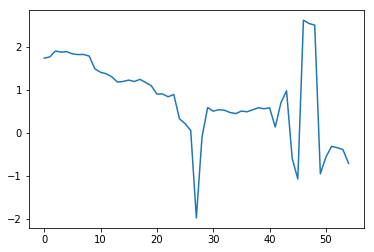

In [35]:
plt.plot(reang_s(inv_13['inv_data_d'][:,6],0.0))
plt.show()

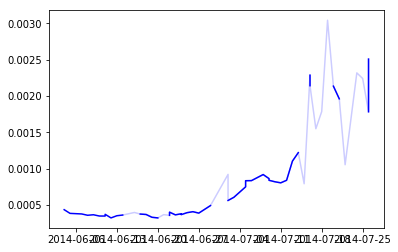

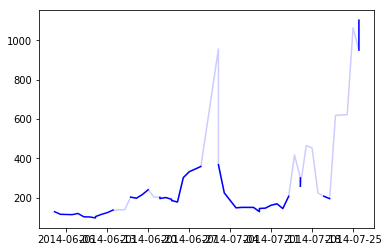

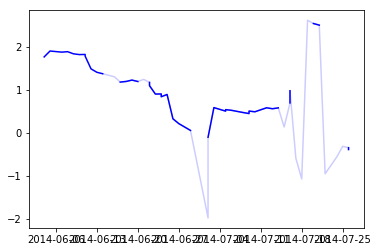

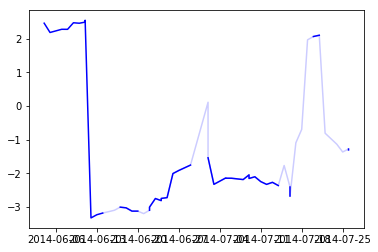

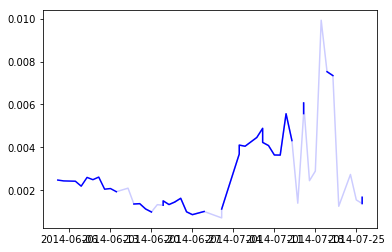

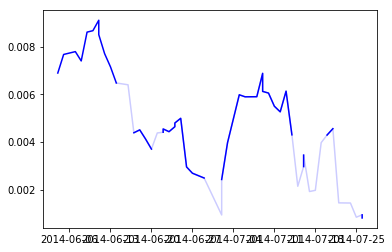

In [36]:
Nansen_filt = 0.0008
rossby_filt = 200
ang_filt = np.pi/2
# try out some data filtering
# i want to greatly dim the results that vary too fast from one case to another
# particularly daily data
plot_vec = make_plot_vec(inv_13,Nansen_filt,rossby_filt,ang_filt,0.0)

plt.plot_date(date_13,plot_vec[:,0,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,0,1],'-b',alpha=0.2)
plt.show()
plt.plot_date(date_13,plot_vec[:,1,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,1,1],'-b',alpha=0.2)
plt.show()
plt.plot_date(date_13,plot_vec[:,2,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,2,1],'-b',alpha=0.2)
plt.show()
plt.plot_date(date_13,plot_vec[:,3,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,3,1],'-b',alpha=0.2)
plt.show()
plt.plot_date(date_13,plot_vec[:,4,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,4,1],'-b',alpha=0.2)
plt.show()
plt.plot_date(date_13,plot_vec[:,5,0],'-b',alpha=1.0)
plt.plot_date(date_13,plot_vec[:,5,1],'-b',alpha=0.2)

plt.show()
# plt.show()
# # d5 geo needs dailies ontop

In [37]:
np.shape(Co_use5_2)

(100,)

[ 0.0005049   0.00122185  0.00299596]


/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


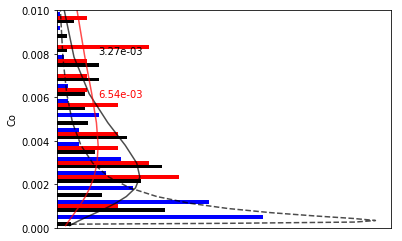

In [39]:
data_d = np.concatenate(((
                        freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4],
                          #(freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        (freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
xp = np.logspace(-4 ,-2, num = 20)
data_Co_use5 = np.concatenate([Co_use5_2,Co_use5_3,Co_use5_4])
data_Co_use5 = data_Co_use5[np.isfinite(data_Co_use5)]
print(np.percentile(data_Co_use5,[25,50,75]))
data_Co_use5 = data_Co_use5[data_Co_use5>2e-4]
shape, loc, scale = stats.lognorm.fit(data_Co_use5)
pdf_use_5 = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_use_5,xp,'--k',alpha=0.7)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d,data_Co_use5],
         range=[0,1e-2],bins=15,color=['k','r','b'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/2,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,1e-2])
plt.ylabel('Co')
plt.xticks([])
plt.show()

In [40]:
data_Co_useg = np.concatenate([Co_useg_2,Co_useg_3,Co_useg_4])
data_Co_useg = data_Co_useg[np.isfinite(data_Co_useg)]
print(np.percentile(data_Co_useg,[25,50,75]))

[ 0.00142063  0.00327411  0.00560235]


In [41]:
data_d = np.concatenate((
                        inv_10['inv_data_d'][:,3]/inv_10['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_13['inv_data_d'][:,3]/inv_13['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_16['inv_data_d'][:,3]/inv_16['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         ))
data_10d = np.concatenate((
                        inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)
data_d = np.concatenate((
                          inv_11['inv_data_d'][:,3]/inv_11['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_14['inv_data_d'][:,3]/inv_14['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_17['inv_data_d'][:,3]/inv_17['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         ))
data_10d = np.concatenate((
                          inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)
data_d = np.concatenate((
                         inv_12['inv_data_d'][:,3]/inv_12['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_15['inv_data_d'][:,3]/inv_15['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_18['inv_data_d'][:,3]/inv_18['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                         ))
data_10d = np.concatenate((
                          inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)

[ 1.37570673  2.17618214  3.86409784]
-0.80047541134 1.68791570004
[ 2.17906701  3.13857463  5.9325625 ]
-0.959507618989 2.7939878708
[ 1.30558975  1.82051904  2.83937442]
-0.514929295859 1.01885537259
[ 1.64322602  2.14065693  3.28069973]
-0.497430904889 1.14004279899
[ 0.74934189  1.02001374  1.39019037]
-0.270671849369 0.370176623503
[ 1.47644006  2.12693956  3.17898581]
-0.650499493484 1.05204625174


In [42]:
plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate((
                        (freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
                         ))
data_10d = np.concatenate((
                        (freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4],
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)
plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate((
                          (freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],
                         ))
data_10d = np.concatenate((
                          (freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)
plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate((
                        (freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],
                        (freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
                         ))
data_10d = np.concatenate((
                         (freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
print(np.percentile(data_d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_d,[25,50,75])*1e3
print(minus - med, plus - med)
print(np.percentile(data_10d,[25,50,75])*1e3)
minus,med,plus = np.percentile(data_10d,[25,50,75])*1e3
print(minus - med, plus - med)

[ 2.52048693  4.11500253  6.44141002]
-1.59451560627 2.32640748557
[  3.17421783   6.53778278  11.67592481]
-3.36356495273 5.13814202768
[ 1.18996502  2.41343534  4.66529783]
-1.22347031615 2.25186249414
[ 1.66022723  2.97464487  4.98068801]
-1.31441764046 2.00604314565
[ 1.54932962  2.21200235  4.49739259]
-0.662672731184 2.28539024379
[ 2.37393035  3.73417976  7.45142606]
-1.36024940174 3.71724630736


/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


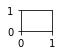

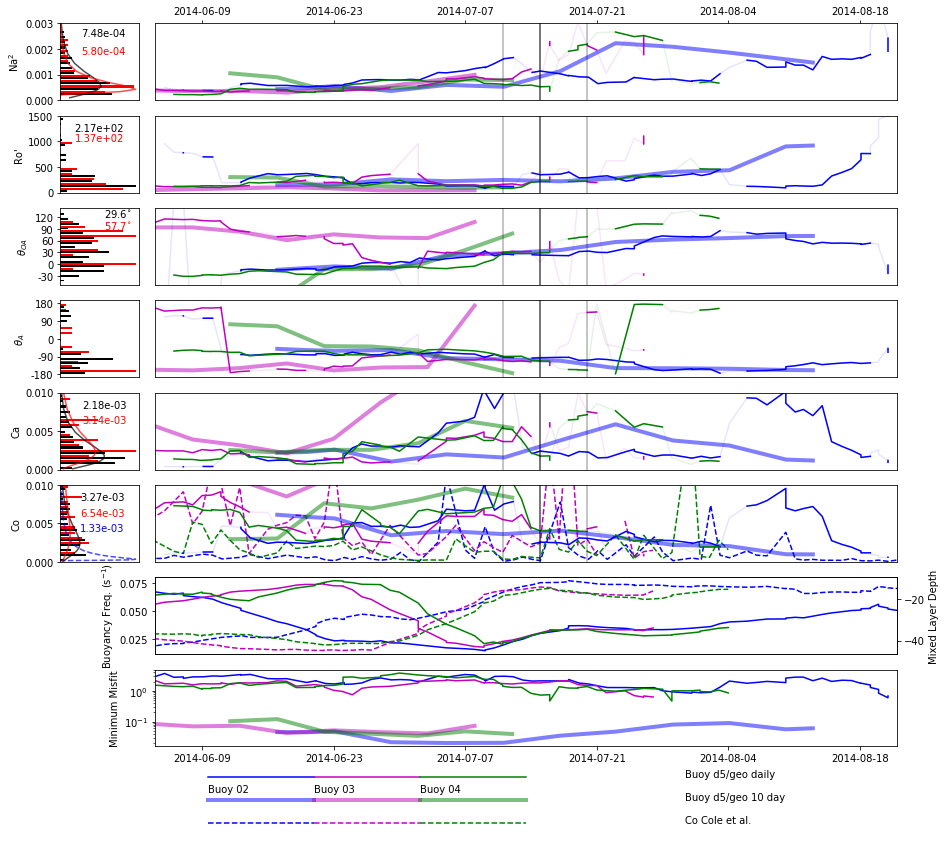

In [43]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-03/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# ADD SIDE HISTOGRAMS TOO
# seperating the d/geo and geo geo runs, emptier
# plot pretty - not diagnostics but useful values
# Na2 Rop Ca Co ThOA ThA
# other access is datetimes
# first set which time series to use
# dates = matplotlib.dates.date2num(list_of_datetimes)
plot_vec_1 = make_plot_vec(inv_10,Nansen_filt,rossby_filt,ang_filt,0.3)
plot_vec_2 = make_plot_vec(inv_13,Nansen_filt,rossby_filt,ang_filt,0.0)
plot_vec_3 = make_plot_vec(inv_16,Nansen_filt,rossby_filt,ang_filt,0.0)

alpha_g = 1.0
alpha_b = 0.1
alpha_w = 0.5
Nansen_filt = 0.0008
rossby_filt = 500
ang_filt = np.pi/2

# matplotlib.pyplot.plot_date(dates, values)
f = plt.figure(figsize=[15,15])
plt.subplot2grid([9,9],[0,0])
# plt.hist([np.concatenate((
data_d = np.concatenate((
                         inv_10['inv_data_d'][:,3],
                          #inv_11['inv_data_d'][:,3],
                         #inv_12['inv_data_d'][:,3],
                          inv_13['inv_data_d'][:,3],
                          #inv_14['inv_data_d'][:,3],
                         #inv_15['inv_data_d'][:,3],
                          inv_16['inv_data_d'][:,3],
                          #inv_17['inv_data_d'][:,4],
                         #inv_18['inv_data_d'][:,3]
                        ))
data_10d = np.concatenate((
                          inv_1['inv_data_d'][:,3],
                          #inv_2['inv_data_d'][:,3],
                          #inv_3['inv_data_d'][:,3],
                          inv_4['inv_data_d'][:,3],
                          #inv_5['inv_data_d'][:,3],
                          #inv_6['inv_data_d'][:,3],
                          inv_7['inv_data_d'][:,3],
                          #inv_8['inv_data_d'][:,3],
                          #inv_9['inv_data_d'][:,3]
                        ))
    
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,0.003],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'Na$^2$')
plt.text(np.max(pdf_d)/2,0.0025,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.0018,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,0.003])
plt.xticks([])
ax = plt.subplot2grid([9,9],[0,1],colspan=8)
# plt.axvline(date_10[46],color='k',alpha = 0.7)
# plt.axvline(datetime.datetime(2014,7,16),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,7,24),color='k',alpha = 0.3)
plt.plot_date(date_1,inv_1['inv_data_d'][:,3],'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_2['inv_data_d'][:,3],'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_3['inv_data_d'][:,3],'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,inv_4['inv_data_d'][:,3],'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_5['inv_data_d'][:,3],'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_6['inv_data_d'][:,3],'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,inv_7['inv_data_d'][:,3],'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_8['inv_data_d'][:,3],'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_9['inv_data_d'][:,3],'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,0,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,0,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,0,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,0,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,0,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,0,1],'-g',alpha=alpha_b)
plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.axvline(date_1[6],color='k',alpha = 0.7)
# plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
# plt.xticks([])
plt.yticks([])
ax.xaxis.tick_top()


plt.subplot2grid([9,9],[1,0])
data_d = np.concatenate((
                        inv_10['inv_data_d'][:,4],
                          #inv_11['inv_data_d'][:,4],
                         #inv_12['inv_data_d'][:,4],
                          inv_13['inv_data_d'][:,4],
                          #inv_14['inv_data_d'][:,4],
                         #inv_15['inv_data_d'][:,4],
                          inv_16['inv_data_d'][:,4],
                          #inv_17['inv_data_d'][:,4],
                         #inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        inv_1['inv_data_d'][:,4],
                          #inv_2['inv_data_d'][:,4],
                          #inv_3['inv_data_d'][:,4],
                          inv_4['inv_data_d'][:,4],
                          #inv_5['inv_data_d'][:,4],
                          #inv_6['inv_data_d'][:,4],
                          inv_7['inv_data_d'][:,4],
                          #inv_8['inv_data_d'][:,4],
                          #inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-0 ,3.5, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
# plt.plot(pdf_d,xp,'-k',alpha=0.7)
# plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1500],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/4,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/4,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.xticks([])
plt.ylim([0,1500])
plt.ylabel('Ro\'')
plt.subplot2grid([9,9],[1,1],colspan=8)
# plt.axvline(date_1[7],color='k',alpha = 0.7)
# plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.plot_date(date_1,inv_1['inv_data_d'][:,4],'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_2['inv_data_d'][:,4],'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_3['inv_data_d'][:,4],'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,inv_4['inv_data_d'][:,4],'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_5['inv_data_d'][:,4],'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_6['inv_data_d'][:,4],'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,inv_7['inv_data_d'][:,4],'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_8['inv_data_d'][:,4],'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_9['inv_data_d'][:,4],'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,1,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,1,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,1,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,1,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,1,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,1,1],'-g',alpha=alpha_b)
plt.ylim([0,1500])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.yticks([])
plt.xticks([])

plt.subplot2grid([9,9],[2,0])
data_d = np.concatenate((
                        reang(inv_10['inv_data_d'][:,6]),
                        #reang(inv_11['inv_data_d'][:,6]),
                         #reang(inv_12['inv_data_d'][:,6]),
                          reang(inv_13['inv_data_d'][:,6]),
                        #reang(inv_14['inv_data_d'][:,6]),
                         #reang(inv_15['inv_data_d'][:,6]),
                          reang(inv_16['inv_data_d'][:,6]),
                        #reang(inv_17['inv_data_d'][:,6]),
                         #reang(inv_18['inv_data_d'][:,6])
                         ))
data_10d = np.concatenate((
                        reang(inv_1['inv_data_d'][:,6]),
                         #reang(inv_2['inv_data_d'][:,6]),
                          #reang(inv_3['inv_data_d'][:,6]),
                          reang(inv_4['inv_data_d'][:,6]),
                         #reang(inv_5['inv_data_d'][:,6]),
                          #reang(inv_6['inv_data_d'][:,6]),
                          reang(inv_7['inv_data_d'][:,6]),
                         #reang(inv_8['inv_data_d'][:,6]),
                          #reang(inv_9['inv_data_d'][:,6])
                        ))
plt.hist([data_d,data_10d],range=[-np.pi/4,3*np.pi/4],bins=15,
         color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
plt.text(0.6,np.deg2rad(120),'{0:.1f}'.format(np.rad2deg(np.median(data_d)))+r'$^{\circ}$',color = 'k')
plt.text(0.6,np.deg2rad(90),'{0:.1f}'.format(np.rad2deg(np.median(data_10d)))+r'$^{\circ}$',color = 'r')
plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
# plt.text(np.max(pdf_d)/2,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
# plt.text(np.max(pdf_d)/2,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel(r'$\theta_{OA}$')
plt.xticks([])
plt.subplot2grid([9,9],[2,1],colspan=8)
plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,6]),'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,6]),'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,6]),'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,6]),'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,6]),'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,6]),'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,6]),'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,6]),'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,6]),'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,2,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,2,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,2,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,2,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,2,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,2,1],'-g',alpha=alpha_b)
plt.ylim([-np.pi/4,3*np.pi/4])
# plt.yticks([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],np.rad2deg([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]))
# plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{OA}$')
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[3,0])
plt.hist([np.concatenate((
                         reang(inv_10['inv_data_d'][:,5]),
                        #reang(inv_11['inv_data_d'][:,5]),
                         #reang(inv_12['inv_data_d'][:,5]),
                          reang(inv_13['inv_data_d'][:,5]),
                     #reang(inv_14['inv_data_d'][:,5]),
                         #reang(inv_15['inv_data_d'][:,5]),
                          reang(inv_16['inv_data_d'][:,5]),
                        #reang(inv_17['inv_data_d'][:,5]),
                         #reang(inv_18['inv_data_d'][:,5])
                         )),
         np.concatenate((
                          reang(inv_1['inv_data_d'][:,5]),
                         #reang(inv_2['inv_data_d'][:,5]),
                          #reang(inv_3['inv_data_d'][:,5]),
                          reang(inv_4['inv_data_d'][:,5]),
                         #reang(inv_5['inv_data_d'][:,5]),
                          #reang(inv_6['inv_data_d'][:,5]),
                          reang(inv_7['inv_data_d'][:,5]),
                         #reang(inv_8['inv_data_d'][:,5]),
                          #reang(inv_9['inv_data_d'][:,5])
                        ))],
         range=[-np.pi,np.pi],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.ylabel(r'$\theta_{A}$')
plt.xticks([])
plt.subplot2grid([9,9],[3,1],colspan=8)
plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,5]),'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,5]),'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,5]),'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,5]),'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,5]),'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,5]),'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,5]),'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,5]),'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,5]),'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,3,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,3,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,3,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,3,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,3,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,3,1],'-g',alpha=alpha_b)
# plt.ylim([-np.pi/4,np.pi/2])
# plt.yticks([-np.pi/8,0,np.pi/8,np.pi/4,3*np.pi/8],[-45,0,45,90,135])
# plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{A}$')
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[4,0])
data_d = np.concatenate((
                        inv_10['inv_data_d'][:,3]/inv_10['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_11['inv_data_d'][:,3]/inv_11['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         #inv_12['inv_data_d'][:,3]/inv_12['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_13['inv_data_d'][:,3]/inv_13['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_14['inv_data_d'][:,3]/inv_14['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         #inv_15['inv_data_d'][:,3]/inv_15['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_16['inv_data_d'][:,3]/inv_16['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_17['inv_data_d'][:,3]/inv_17['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         #inv_18['inv_data_d'][:,3]/inv_18['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                         ))
data_10d = np.concatenate((
                        inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/2,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel('Ca')
plt.ylim([0,1e-2])
plt.xticks([])
plt.subplot2grid([9,9],[4,1],colspan=8)
plt.plot_date(date_1,inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,4,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,4,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,4,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,4,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,4,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,4,1],'-g',alpha=alpha_b)
# # plt.plot(index_1,inv_1['inv_data_d'][:,8]/inv_1['inv_data_d'][:,11]*(rhoi/rhoa),'--k')
# # plt.plot(index_2,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(rhoi/rhoa),'r')
# # plt.plot(index_2,inv_2['inv_data_d'][:,8]/inv_2['inv_data_d'][:,11]*(rhoi/rhoa),'--m')
# # plt.ylim([0,1e-2])
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Ca')
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate(((
                        freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4],
                          #(freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        (freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
data_Co_use5 = np.concatenate([Co_use5_2,Co_use5_3,Co_use5_4])
data_Co_use5 = data_Co_use5[np.isfinite(data_Co_use5)]
data_Co_use5 = data_Co_use5[data_Co_use5>2e-4]
shape, loc, scale = stats.lognorm.fit(data_Co_use5)
pdf_use_5 = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_use_5,xp,'--b',alpha=0.7)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d),0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d),0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.text(np.max(pdf_d),0.004,'{0:.2e}'.format(np.median(data_Co_use5)),color = 'b')
plt.ylim([0,1e-2])
plt.ylabel('Co')
plt.xticks([])
plt.subplot2grid([9,9],[5,1],colspan=8)
plt.plot_date(date_10,Co_use5_2,'--b')#,color = [0.4,0.4,0.8])
plt.plot_date(date_13,Co_use5_3,'--m')#,color = [0.8,0,0.8])
plt.plot_date(date_16,Co_use5_4,'--g')#,color = [0.0,0.8,0.8])
# plt.plot_date(date_10,Co_useg_2,'--k',color = [0.4,0.4,0.8])
# plt.plot_date(date_13,Co_useg_3,'--k',color = [0.8,0,0.8])
# plt.plot_date(date_16,Co_useg_4,'--k',color = [0.0,0.8,0.8])
plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4], '-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4], '-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4], '-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4],'-g',linewidth=4,alpha=alpha_w)
plt.plot_date(date_10,plot_vec_1[:,5,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,5,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,5,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,5,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,5,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,5,1],'-g',alpha=alpha_b)
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,4],'k')
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,11],'--k')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,4],'r')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,11],'--m')
# # plt.plot( data_mean_geo[:,6],'g')
# # plt.plot( data_mean_geo[:,7],'b')
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Co')
plt.axvline(date_10[42],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.yticks([])

ax1 = plt.subplot2grid([9,9],[6,1],colspan=8)
# plt.plot(date_10,NSIDC_use_2,'-b')
# # plt.plot(date_10[0:-4],NSIDC_use_2[0:-4],'-k')
# plt.plot_date(date_13,NSIDC_use_3,'-m')
# plt.plot_date(date_16,NSIDC_use_4,'-g')
# plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.ylabel('Concentration')

plt.plot(date_10,buoy_freq_use_2,'-b')
plt.plot(date_13,buoy_freq_use_3,'-m')
plt.plot(date_16,buoy_freq_use_4,'-g')
# # plt.plot(date_10[0:-4],NSIDC_use_2[0:-4],'-k')
# plt.plot_date(date_13,NSIDC_use_3,'-r')
# plt.plot_date(date_16,NSIDC_use_4,'-g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel(r'Buoyancy Freq. (s$^{-1}$)')
plt.xticks([])

ax2 = ax1.twinx()
# plt.plot(date_10[0:-4],hifc_use_2[0:-4],'-k')
# plt.plot_date(date_10,hifc_use_2,'--b')
# plt.plot_date(date_13,hifc_use_3,'--m')
# plt.plot_date(date_16,hifc_use_4,'--g')
# plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.ylabel('Ice thickness (m)')

plt.plot_date(date_10,-MLD_use_2,'--b')
plt.plot_date(date_13,-MLD_use_3,'--m')
plt.plot_date(date_16,-MLD_use_4,'--g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel('Mixed Layer Depth')
plt.xticks([])

# plt.xticks([])

plt.subplot2grid([9,9],[7,1],colspan=8)
plt.plot_date(date_10,inv_10['inv_data_d'][:,0],'-b')
# plt.plot_date(date_10,inv_11['inv_data_d'][:,0],'-k',alpha=0.7)
# plt.plot_date(date_10,inv_12['inv_data_d'][:,0],'-k',alpha=0.7)
plt.plot_date(date_13,inv_13['inv_data_d'][:,0],'-m')
# plt.plot_date(date_13,inv_14['inv_data_d'][:,0],'-m',alpha=0.7)
# plt.plot_date(date_13,inv_15['inv_data_d'][:,0],'-m',alpha=0.7)
plt.plot_date(date_16,inv_16['inv_data_d'][:,0],'-g')
# plt.plot_date(date_16,inv_17['inv_data_d'][:,0],'-g',alpha=0.7)
# plt.plot_date(date_16,inv_18['inv_data_d'][:,0],'-g',alpha=0.7)
plt.plot_date(date_1,inv_1['inv_data_d'][:,0],'-b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_2['inv_data_d'][:,0],'--b',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_1,inv_3['inv_data_d'][:,0],'-b',linewidth=4,alpha=alpha_w)
plt.plot_date(date_4,inv_4['inv_data_d'][:,0],'-m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_5['inv_data_d'][:,0],'--m',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_4,inv_6['inv_data_d'][:,0],'-m',linewidth=4,alpha=alpha_w)
plt.plot_date(date_7,inv_7['inv_data_d'][:,0],'-g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_8['inv_data_d'][:,0],'--g',linewidth=4,alpha=alpha_w)
# plt.plot_date(date_7,inv_9['inv_data_d'][:,0],'-g',linewidth=4,alpha=alpha_w)
plt.yscale('log')
# plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.xticks([datetime.datetime(2014,7,1),datetime.datetime(2014,8,1),datetime.datetime(2014,[9,9])])
plt.ylabel('Minimum Misfit')


##### legend plot
ax = plt.subplot2grid([9,9],[8,1],colspan=9)
# plt.plot(,nbals_1,'k')
# plt.text(0.1,0.9,'d/geo buoy')
# plt.text(0.2,0.9,'geo/geo buoy')
# plt.text(0.3,0.9,'geo/geo satelite')
# plt.text(0.4,0.9,'Co Cole et al.')
plt.text(0.1,0.6,'Buoy 02')
plt.text(0.2,0.6,'Buoy 03')
plt.text(0.3,0.6,'Buoy 04')
# plt.text(0.55,0.8,'Satellite geo')
plt.text(0.55,0.8,'Buoy d5/geo daily')
# plt.text(0.55,0.8,'Buoy geo')
# plt.text(0.55,0.8,'SAT daily')
plt.plot([0.1,0.2],[0.8,0.8],'-b');
plt.plot([0.2,0.3],[0.8,0.8],'-m')
plt.plot([0.3,0.4],[0.8,0.8],'-g')
plt.plot([0.1,0.2],[0.5,0.5],'-b',linewidth=4,alpha=alpha_w);
plt.plot([0.2,0.3],[0.5,0.5],'-m',linewidth=4,alpha=alpha_w)
plt.plot([0.3,0.4],[0.5,0.5],'-g',linewidth=4,alpha=alpha_w)
# plt.plot([0.1,0.2],[0.2,0.2],'--b',linewidth=4,alpha=alpha_w);
# plt.plot([0.2,0.3],[0.2,0.2],'--m',linewidth=4,alpha=alpha_w)
# plt.plot([0.3,0.4],[0.2,0.2],'--g',linewidth=4,alpha=alpha_w)
plt.plot([0.1,0.2],[0.2,0.2],'--b');
plt.plot([0.2,0.3],[0.2,0.2],'--m')
plt.plot([0.3,0.4],[0.2,0.2],'--g')
# plt.plot([0.4,0.5],[0.8,0.8],'-k',color = [0.4,0.4,0.8],alpha=0.7)
# plt.plot([0.1,0.2],[0.5,0.5],'-m',color = [0.4,0.4,0.8],alpha=0.7)
# plt.text(0.55,0.5,'Co Cole et al.')
plt.text(0.55,0.5,'Buoy d5/geo 10 day')
# plt.text(0.55,0.5,'SAT geo, 10 day')
# plt.plot([0.2,0.3],[0.5,0.5],'-m',color = [0.8,0,0.8],alpha=0.7)
# plt.plot([0.3,0.4],[0.5,0.5],'-m',color = [0,0.8,0.8],alpha=0.7)
# plt.plot([0.4,0.5],[0.5,0.5],'-k',color = [0.8,0,0.8],alpha=0.7)
# plt.plot([0.1,0.2],[0.2,0.2],'-g')
# plt.text(0.55,0.2,'Buoy geo, 10 day')
plt.text(0.55,0.2,'Co Cole et al.')
# plt.plot([0.2,0.3],[0.2,0.2],'--g',alpha=0.7)
# plt.plot([0.3,0.4],[0.2,0.2],'-.g',alpha=0.7)
# plt.plot([0.4,0.5],[0.2,0.2],'-k',color = [0,0.8,0.8],alpha=0.7)
ax.axis('off')
# plt.plot(0.15,0.8,'-b',linewidth=4,alpha=alpha_w)
# plt.plot(0.25,0.8,'-m',linewidth=4,alpha=alpha_w)
# plt.plot(0.35,0.8,'-g',linewidth=4,alpha=alpha_w)
# plt.plot(0.15,0.5,'-b',linewidth=4,alpha=alpha_w)
# # plt.plot(0.15,0.5,'-m',linewidth=4,alpha=alpha_w)
# plt.plot(0.25,0.5,'-m',linewidth=4,alpha=alpha_w)
# # plt.plot(0.35,0.5,'xr',linewidth=4,alpha=alpha_w)
# # plt.plot(0.15,0.2,'-g',linewidth=4,alpha=alpha_w)
# plt.plot(0.35,0.5,'-g',linewidth=4,alpha=alpha_w)
# plt.plot(0.35,0.2,'xg',linewidth=4,alpha=alpha_w)
plt.xlim([0.05,0.75])
plt.ylim([0.0,1.0])
# # # plt.ylim([0,10])
# # # plt.xlim([index_1[0],index_1[ninv_1-2]])

f.savefig(fig_location+'processed_compare_d5_geo_buoy_hist_filter.pdf',format='pdf',bbox_inches='tight')
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


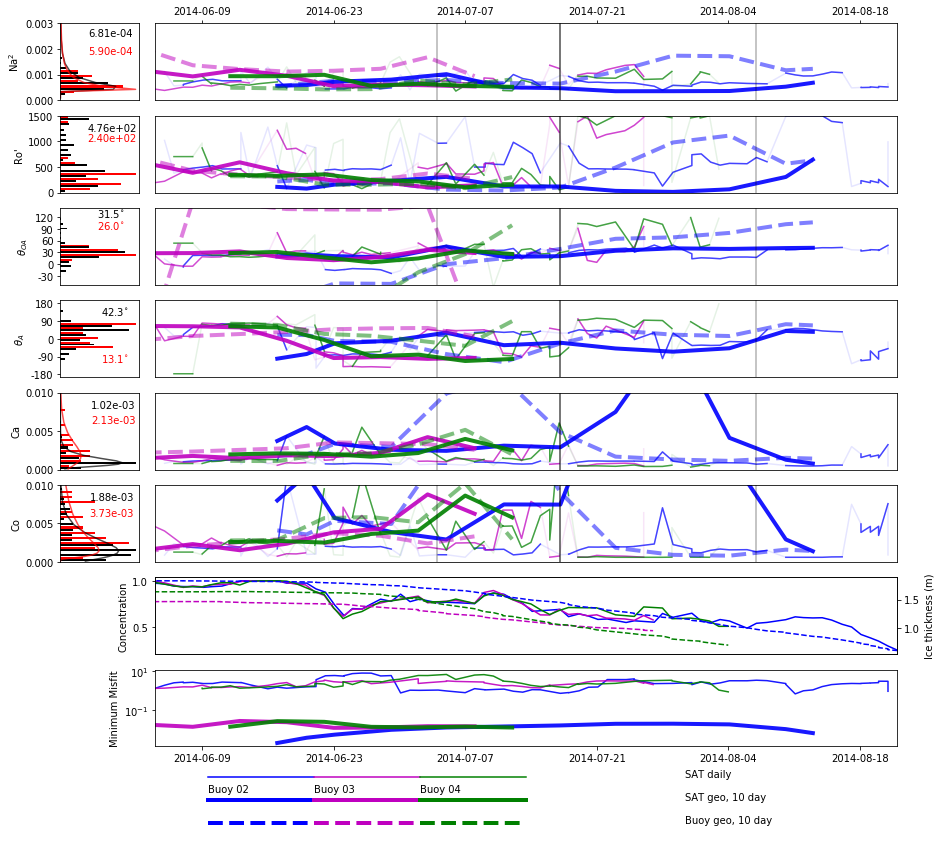

In [44]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-03/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# ADD SIDE HISTOGRAMS TOO
# seperating the d/geo and geo geo runs, emptier
# plot pretty - not diagnostics but useful values
# Na2 Rop Ca Co ThOA ThA
# other access is datetimes
# first set which time series to use
# dates = matplotlib.dates.date2num(list_of_datetimes)

plot_vec_1 = make_plot_vec(inv_12,Nansen_filt,rossby_filt,ang_filt,0.3)
plot_vec_2 = make_plot_vec(inv_15,Nansen_filt,rossby_filt,ang_filt,0.0)
plot_vec_3 = make_plot_vec(inv_18,Nansen_filt,rossby_filt,ang_filt,0.0)

alpha_g = 0.7
alpha_b = 0.1
alpha_w = 0.9
Nansen_filt = 0.0008
rossby_filt = 500
ang_filt = np.pi/2

# matplotlib.pyplot.plot_date(dates, values)
f = plt.figure(figsize=[15,15])
plt.subplot2grid([9,9],[0,0])
# plt.hist([np.concatenate((
data_d = np.concatenate((
#                         inv_10['inv_data_d'][:,3],
                          #inv_11['inv_data_d'][:,3],
                         inv_12['inv_data_d'][:,3],
#                          inv_13['inv_data_d'][:,3],
                          #inv_14['inv_data_d'][:,3],
                         inv_15['inv_data_d'][:,3],
#                          inv_16['inv_data_d'][:,3],
                          #inv_17['inv_data_d'][:,4],
                         inv_18['inv_data_d'][:,3]
                        ))
data_10d = np.concatenate((
#                          inv_1['inv_data_d'][:,3],
                          #inv_2['inv_data_d'][:,3],
                          inv_3['inv_data_d'][:,3],
#                          inv_4['inv_data_d'][:,3],
                          #inv_5['inv_data_d'][:,3],
                          inv_6['inv_data_d'][:,3],
#                          inv_7['inv_data_d'][:,3],
                          #inv_8['inv_data_d'][:,3],
                          inv_9['inv_data_d'][:,3]
                        ))
    
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,0.003],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'Na$^2$')
plt.text(np.max(pdf_d)/2,0.0025,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.0018,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,0.003])
plt.xticks([])
ax = plt.subplot2grid([9,9],[0,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,0,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,0,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,0,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,0,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,0,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,0,1],'-g',alpha=alpha_b)
# plt.axvline(date_10[46],color='k',alpha = alpha_w)
# plt.axvline(datetime.datetime(2014,7,16),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,7,24),color='k',alpha = 0.3)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,3],'-b',markersize = 10)
plt.plot_date(date_1,inv_2['inv_data_d'][:,3],'--b',linewidth=4,alpha=0.5,markersize = 10)
plt.plot_date(date_1,inv_3['inv_data_d'][:,3],'-b',linewidth=4,alpha=alpha_w,markersize = 10)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,3],'-m',markersize = 10)
plt.plot_date(date_4,inv_5['inv_data_d'][:,3],'--m',linewidth=4,alpha=0.5,markersize = 10)
plt.plot_date(date_4,inv_6['inv_data_d'][:,3],'-m',linewidth=4,alpha=alpha_w,markersize = 10)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,3],'-g',markersize = 10)
plt.plot_date(date_7,inv_8['inv_data_d'][:,3],'--g',linewidth=4,alpha=0.5,markersize = 10)
plt.plot_date(date_7,inv_9['inv_data_d'][:,3],'-g',linewidth=4,alpha=alpha_w,markersize = 10)
plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
# plt.xticks([])
plt.yticks([])
ax.xaxis.tick_top()


plt.subplot2grid([9,9],[1,0])
data_d = np.concatenate((
                        #inv_10['inv_data_d'][:,4],
                          #inv_11['inv_data_d'][:,4],
                         inv_12['inv_data_d'][:,4],
#                          inv_13['inv_data_d'][:,4],
                          #inv_14['inv_data_d'][:,4],
                         inv_15['inv_data_d'][:,4],
#                          inv_16['inv_data_d'][:,4],
                          #inv_17['inv_data_d'][:,4],
                         inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        #inv_1['inv_data_d'][:,4],
                          #inv_2['inv_data_d'][:,4],
                          inv_3['inv_data_d'][:,4],
#                          inv_4['inv_data_d'][:,4],
                          #inv_5['inv_data_d'][:,4],
                          inv_6['inv_data_d'][:,4],
#                          inv_7['inv_data_d'][:,4],
                          #inv_8['inv_data_d'][:,4],
                          inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-0 ,3.5, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
# plt.plot(pdf_d,xp,'-k',alpha=alpha_w)
# plt.plot(pdf_10d,xp,'-r',alpha=alpha_w)
plt.hist([data_d,data_10d],
         range=[0,1500],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/4,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/4,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.xticks([])
plt.ylim([0,1500])
plt.ylabel('Ro\'')
plt.subplot2grid([9,9],[1,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,1,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,1,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,1,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,1,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,1,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,1,1],'-g',alpha=alpha_b)
# plt.axvline(date_1[7],color='k',alpha = alpha_w)
# plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,4],'-b',linewidth = 4)
plt.plot_date(date_1,inv_2['inv_data_d'][:,4],'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,inv_3['inv_data_d'][:,4],'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,4],'-m',linewidth = 4)
plt.plot_date(date_4,inv_5['inv_data_d'][:,4],'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,inv_6['inv_data_d'][:,4],'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,4],'-g',linewidth = 4)
plt.plot_date(date_7,inv_8['inv_data_d'][:,4],'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,inv_9['inv_data_d'][:,4],'-g',alpha=alpha_w,linewidth = 4)
plt.ylim([0,1500])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.yticks([])
plt.xticks([])

plt.subplot2grid([9,9],[2,0])
data_d = np.concatenate((
                        #reang(inv_10['inv_data_d'][:,6]),
                        #reang(inv_11['inv_data_d'][:,6]),
                         reang(inv_12['inv_data_d'][:,6]),
#                          reang(inv_13['inv_data_d'][:,6]),
                        #reang(inv_14['inv_data_d'][:,6]),
                         reang(inv_15['inv_data_d'][:,6]),
#                          reang(inv_16['inv_data_d'][:,6]),
                        #reang(inv_17['inv_data_d'][:,6]),
                         reang(inv_18['inv_data_d'][:,6])
                         ))
data_10d = np.concatenate((
                        #reang(inv_1['inv_data_d'][:,6]),
                         #reang(inv_2['inv_data_d'][:,6]),
                          reang(inv_3['inv_data_d'][:,6]),
#                          reang(inv_4['inv_data_d'][:,6]),
                         #reang(inv_5['inv_data_d'][:,6]),
                          reang(inv_6['inv_data_d'][:,6]),
#                          reang(inv_7['inv_data_d'][:,6]),
                         #reang(inv_8['inv_data_d'][:,6]),
                          reang(inv_9['inv_data_d'][:,6])
                        ))
plt.hist([data_d,data_10d],range=[-np.pi/4,3*np.pi/4],bins=15,
         color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
plt.text(1,np.deg2rad(120),'{0:.1f}'.format(np.rad2deg(np.median(data_d)))+r'$^{\circ}$',color = 'k')
plt.text(1,np.deg2rad(90),'{0:.1f}'.format(np.rad2deg(np.median(data_10d)))+r'$^{\circ}$',color = 'r')
plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
# plt.text(np.max(pdf_d)/2,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
# plt.text(np.max(pdf_d)/2,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel(r'$\theta_{OA}$')
plt.xticks([])
plt.subplot2grid([9,9],[2,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,2,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,2,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,2,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,2,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,2,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,2,1],'-g',alpha=alpha_b)
# plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,6]),'-b',linewidth = 4)
plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,6]),'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,6]),'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,6]),'-m',linewidth = 4)
plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,6]),'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,6]),'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,6]),'-g',linewidth = 4)
plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,6]),'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,6]),'-g',alpha=alpha_w,linewidth = 4)
plt.ylim([-np.pi/4,3*np.pi/4])
# plt.yticks([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],np.rad2deg([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]))
# plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{OA}$')
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[3,0])
data_d = np.concatenate((
                        #reang(inv_10['inv_data_d'][:,5]),
                        #reang(inv_11['inv_data_d'][:,5]),
                         reang(inv_12['inv_data_d'][:,5]),
#                          reang(inv_13['inv_data_d'][:,5]),
                        #reang(inv_14['inv_data_d'][:,5]),
                         reang(inv_15['inv_data_d'][:,5]),
#                          reang(inv_16['inv_data_d'][:,5]),
                        #reang(inv_17['inv_data_d'][:,5]),
                         reang(inv_18['inv_data_d'][:,5])
                         ))
data_10d = np.concatenate((
                        #reang(inv_1['inv_data_d'][:,5]),
                         #reang(inv_2['inv_data_d'][:,5]),
                          reang(inv_3['inv_data_d'][:,5]),
#                          reang(inv_4['inv_data_d'][:,5]),
                         #reang(inv_5['inv_data_d'][:,5]),
                          reang(inv_6['inv_data_d'][:,5]),
#                          reang(inv_7['inv_data_d'][:,5]),
                         #reang(inv_8['inv_data_d'][:,5]),
                          reang(inv_9['inv_data_d'][:,5])
                        ))
plt.hist([data_d,data_10d],range=[-np.pi,np.pi],bins=15,
         color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
plt.text(0.4,np.deg2rad(120),'{0:.1f}'.format(np.rad2deg(np.median(data_d)))+r'$^{\circ}$',color = 'k')
plt.text(0.4,np.deg2rad(-120),'{0:.1f}'.format(np.rad2deg(np.median(data_10d)))+r'$^{\circ}$',color = 'r')
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.ylabel(r'$\theta_{A}$')
plt.xticks([])

plt.subplot2grid([9,9],[3,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,3,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,3,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,3,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,3,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,3,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,3,1],'-g',alpha=alpha_b)
# plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,5]),'-b',linewidth = 4)
plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,5]),'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,5]),'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,5]),'-m',linewidth = 4)
plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,5]),'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,5]),'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,5]),'-g',linewidth = 4)
plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,5]),'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,5]),'-g',alpha=alpha_w,linewidth = 4)
# plt.ylim([-np.pi/4,np.pi/2])
# plt.yticks([-np.pi/8,0,np.pi/8,np.pi/4,3*np.pi/8],[-45,0,45,90,135])
# plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{A}$')
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[4,0])
data_d = np.concatenate((
                        #inv_10['inv_data_d'][:,3]/inv_10['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_11['inv_data_d'][:,3]/inv_11['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_12['inv_data_d'][:,3]/inv_12['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_13['inv_data_d'][:,3]/inv_13['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_14['inv_data_d'][:,3]/inv_14['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_15['inv_data_d'][:,3]/inv_15['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_16['inv_data_d'][:,3]/inv_16['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_17['inv_data_d'][:,3]/inv_17['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_18['inv_data_d'][:,3]/inv_18['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                         ))
data_10d = np.concatenate((
                        #inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          #inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/2,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel('Ca')
plt.ylim([0,1e-2])
plt.xticks([])
plt.subplot2grid([9,9],[4,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,4,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,4,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,4,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,4,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,4,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,4,1],'-g',alpha=alpha_b)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',linewidth = 4)
plt.plot_date(date_1,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',linewidth = 4)
plt.plot_date(date_4,inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',linewidth = 4)
plt.plot_date(date_7,inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',alpha=alpha_w,linewidth = 4)
# # plt.plot(index_1,inv_1['inv_data_d'][:,8]/inv_1['inv_data_d'][:,11]*(rhoi/rhoa),'--k')
# # plt.plot(index_2,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(rhoi/rhoa),'r')
# # plt.plot(index_2,inv_2['inv_data_d'][:,8]/inv_2['inv_data_d'][:,11]*(rhoi/rhoa),'--m')
# # plt.ylim([0,1e-2])
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Ca')
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.yticks([])

plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate((
                        #(freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],
                           (freedrift.rhoi/freedrift.rhoo)/inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        #(freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],
                           (freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/2,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,1e-2])
plt.ylabel('Co')
plt.xticks([])
plt.subplot2grid([9,9],[5,1],colspan=8)
plt.plot_date(date_10,plot_vec_1[:,5,0],'-b',alpha=alpha_g)
plt.plot_date(date_10,plot_vec_1[:,5,1],'-b',alpha=alpha_b)
plt.plot_date(date_13,plot_vec_2[:,5,0],'-m',alpha=alpha_g)
plt.plot_date(date_13,plot_vec_2[:,5,1],'-m',alpha=alpha_b)
plt.plot_date(date_16,plot_vec_3[:,5,0],'-g',alpha=alpha_g)
plt.plot_date(date_16,plot_vec_3[:,5,1],'-g',alpha=alpha_b)
# plt.plot_date(date_10,Co_use5_2,'-k',color = [0.4,0.4,0.8])
# plt.plot_date(date_13,Co_use5_3,'-k',color = [0.8,0,0.8])
# plt.plot_date(date_16,Co_use5_4,'-k',color = [0.0,0.8,0.8])
# plt.plot_date(date_10,Co_useg_2,'--k',color = [0.4,0.4,0.8])
# plt.plot_date(date_13,Co_useg_3,'--k',color = [0.8,0,0.8])
# plt.plot_date(date_16,Co_useg_4,'--k',color = [0.0,0.8,0.8])
# plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4], '-b',linewidth = 4)
plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4], '-m',linewidth = 4)
plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4], '-g',linewidth = 4)
plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4],'-g',alpha=alpha_w,linewidth = 4)
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,4],'k')
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,11],'--k')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,4],'r')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,11],'--m')
# # plt.plot( data_mean_geo[:,6],'g')
# # plt.plot( data_mean_geo[:,7],'b')
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Co')
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
plt.yticks([])

ax1 = plt.subplot2grid([9,9],[6,1],colspan=8)
plt.plot(date_10,NSIDC_use_2,'-b')
# plt.plot(date_10[0:-4],NSIDC_use_2[0:-4],'-k')
plt.plot_date(date_13,NSIDC_use_3,'-m')
plt.plot_date(date_16,NSIDC_use_4,'-g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel('Concentration')
plt.xticks([])

ax2 = ax1.twinx()
# plt.plot(date_10[0:-4],hifc_use_2[0:-4],'-k')
plt.plot_date(date_10,hifc_use_2,'--b')
plt.plot_date(date_13,hifc_use_3,'--m')
plt.plot_date(date_16,hifc_use_4,'--g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel('Ice thickness (m)')

# plt.plot_date(date_10,-MLD_use_2,'-.k')
# plt.plot_date(date_13,-MLD_use_3,'-.r')
# plt.plot_date(date_16,-MLD_use_4,'-.g')
# plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.ylabel('Mixed Layer Depth')
plt.xticks([])

# plt.xticks([])

plt.subplot2grid([9,9],[7,1],colspan=8)
# plt.plot_date(date_10,inv_10['inv_data_d'][:,0],'-k')
# plt.plot_date(date_10,inv_11['inv_data_d'][:,0],'-k',alpha=alpha_w)
plt.plot_date(date_10,inv_12['inv_data_d'][:,0],'-b',alpha=alpha_w)
# plt.plot_date(date_13,inv_13['inv_data_d'][:,0],'-m')
# plt.plot_date(date_13,inv_14['inv_data_d'][:,0],'-m',alpha=alpha_w)
plt.plot_date(date_13,inv_15['inv_data_d'][:,0],'-m',alpha=alpha_w)
# plt.plot_date(date_16,inv_16['inv_data_d'][:,0],'-g')
# plt.plot_date(date_16,inv_17['inv_data_d'][:,0],'-g',alpha=alpha_w)
plt.plot_date(date_16,inv_18['inv_data_d'][:,0],'-g',alpha=alpha_w)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,0],'-b',linewidth = 4)
# plt.plot_date(date_1,inv_2['inv_data_d'][:,0],'--b',alpha=0.5,linewidth = 4)
plt.plot_date(date_1,inv_3['inv_data_d'][:,0],'-b',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,0],'-m',linewidth = 4)
# plt.plot_date(date_4,inv_5['inv_data_d'][:,0],'--m',alpha=0.5,linewidth = 4)
plt.plot_date(date_4,inv_6['inv_data_d'][:,0],'-m',alpha=alpha_w,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,0],'-g',linewidth = 4)
# plt.plot_date(date_7,inv_8['inv_data_d'][:,0],'--g',alpha=0.5,linewidth = 4)
plt.plot_date(date_7,inv_9['inv_data_d'][:,0],'-g',alpha=alpha_w,linewidth = 4)
plt.yscale('log')
# plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.xticks([datetime.datetime(2014,7,1),datetime.datetime(2014,8,1),datetime.datetime(2014,[9,9])])
plt.ylabel('Minimum Misfit')


##### legend plot
ax = plt.subplot2grid([9,9],[8,1],colspan=9)
# plt.plot(,nbals_1,'k')
# plt.text(0.1,0.9,'d/geo buoy')
# plt.text(0.2,0.9,'geo/geo buoy')
# plt.text(0.3,0.9,'geo/geo satelite')
# plt.text(0.4,0.9,'Co Cole et al.')
plt.text(0.1,0.6,'Buoy 02')
plt.text(0.2,0.6,'Buoy 03')
plt.text(0.3,0.6,'Buoy 04')
# plt.text(0.55,0.8,'Satellite geo')
# plt.text(0.55,0.8,'Buoy geo')
plt.text(0.55,0.8,'SAT daily')
plt.plot([0.1,0.2],[0.8,0.8],'-b');
plt.plot([0.2,0.3],[0.8,0.8],'-m')
plt.plot([0.3,0.4],[0.8,0.8],'-g')
plt.plot([0.1,0.2],[0.5,0.5],'-b',linewidth = 4);
plt.plot([0.2,0.3],[0.5,0.5],'-m',linewidth = 4)
plt.plot([0.3,0.4],[0.5,0.5],'-g',linewidth = 4)
plt.plot([0.1,0.2],[0.2,0.2],'--b',linewidth = 4);
plt.plot([0.2,0.3],[0.2,0.2],'--m',linewidth = 4)
plt.plot([0.3,0.4],[0.2,0.2],'--g',linewidth = 4)
# plt.plot([0.4,0.5],[0.8,0.8],'-k',color = [0.4,0.4,0.8],alpha=alpha_w)
# plt.plot([0.1,0.2],[0.5,0.5],'-m',color = [0.4,0.4,0.8],alpha=alpha_w)
# plt.text(0.55,0.5,'Co Cole et al.')
plt.text(0.55,0.5,'SAT geo, 10 day')
# plt.plot([0.2,0.3],[0.5,0.5],'-m',color = [0.8,0,0.8],alpha=alpha_w)
# plt.plot([0.3,0.4],[0.5,0.5],'-m',color = [0,0.8,0.8],alpha=alpha_w)
# plt.plot([0.4,0.5],[0.5,0.5],'-k',color = [0.8,0,0.8],alpha=alpha_w)
# plt.plot([0.1,0.2],[0.2,0.2],'-g')
plt.text(0.55,0.2,'Buoy geo, 10 day')
# plt.plot([0.2,0.3],[0.2,0.2],'--g',alpha=alpha_w)
# plt.plot([0.3,0.4],[0.2,0.2],'-.g',alpha=alpha_w)
# plt.plot([0.4,0.5],[0.2,0.2],'-k',color = [0,0.8,0.8],alpha=alpha_w)
ax.axis('off')
# plt.plot(0.15,0.8,'-b',linewidth = 4)
# plt.plot(0.25,0.8,'-m',linewidth = 4)
# plt.plot(0.35,0.8,'-g',linewidth = 4)
# plt.plot(0.15,0.5,'-b',alpha=alpha_w,linewidth = 4)
# # plt.plot(0.15,0.5,'-m',linewidth = 4)
# plt.plot(0.25,0.5,'-m',alpha=alpha_w,linewidth = 4)
# # plt.plot(0.35,0.5,'xr',alpha=alpha_w,linewidth = 4)
# # plt.plot(0.15,0.2,'-g',linewidth = 4)
# plt.plot(0.35,0.5,'-g',alpha=alpha_w,linewidth = 4)
# plt.plot(0.35,0.2,'xg',alpha=alpha_w,linewidth = 4)
plt.xlim([0.05,0.75])
plt.ylim([0.0,1.0])
# # # plt.ylim([0,10])
# # # plt.xlim([index_1[0],index_1[ninv_1-2]])

f.savefig(fig_location+'processed_compare_geo_geo_SAT_hist_filter.pdf',format='pdf',bbox_inches='tight')
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


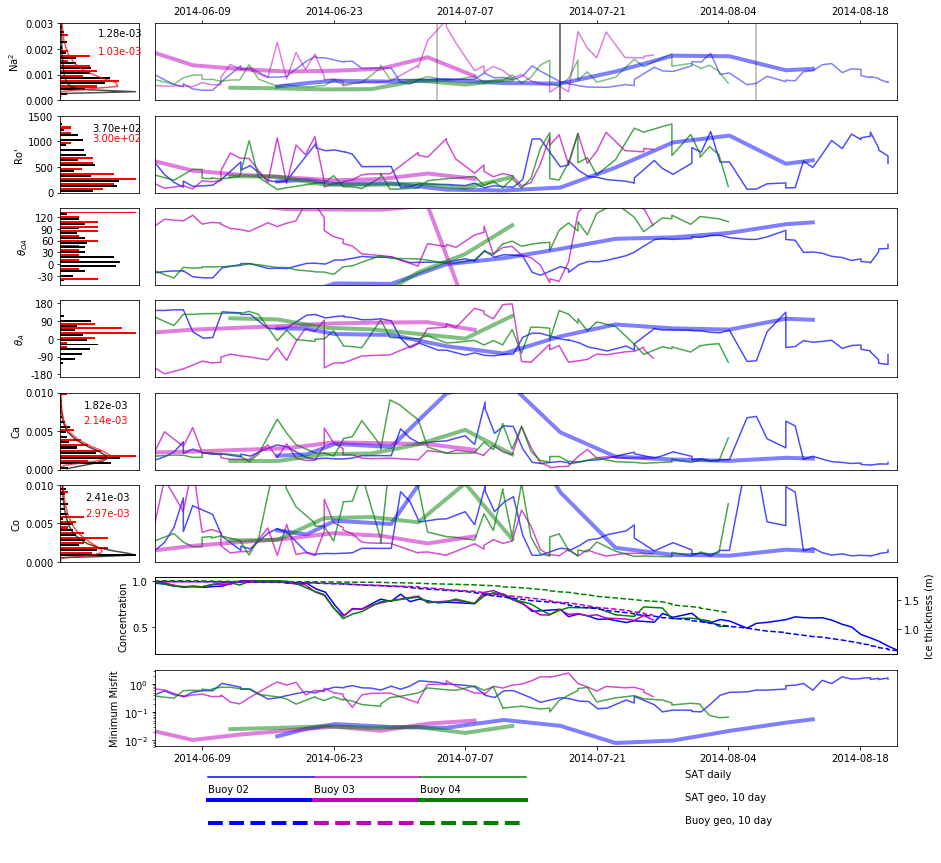

In [54]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-03/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# ADD SIDE HISTOGRAMS TOO
# seperating the d/geo and geo geo runs, emptier
# plot pretty - not diagnostics but useful values
# Na2 Rop Ca Co ThOA ThA
# other access is datetimes
# first set which time series to use
# dates = matplotlib.dates.date2num(list_of_datetimes)

# matplotlib.pyplot.plot_date(dates, values)
f = plt.figure(figsize=[15,15])
plt.subplot2grid([9,9],[0,0])
# plt.hist([np.concatenate((
data_d = np.concatenate((
#                         inv_10['inv_data_d'][:,3],
                          #inv_11['inv_data_d'][:,3],
                          inv_12['inv_data_d'][:,3],
#                          inv_13['inv_data_d'][:,3],
                          #inv_14['inv_data_d'][:,3],
                          inv_15['inv_data_d'][:,3],
#                          inv_16['inv_data_d'][:,3],
                          #inv_17['inv_data_d'][:,4],
                          inv_18['inv_data_d'][:,3]
                        ))
data_10d = np.concatenate((
#                          inv_1['inv_data_d'][:,3],
                          #inv_2['inv_data_d'][:,3],
                           inv_3['inv_data_d'][:,3],
#                          inv_4['inv_data_d'][:,3],
                          #inv_5['inv_data_d'][:,3],
                           inv_6['inv_data_d'][:,3],
#                          inv_7['inv_data_d'][:,3],
                          #inv_8['inv_data_d'][:,3],
                           inv_9['inv_data_d'][:,3]
                        ))
    
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,0.003],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'Na$^2$')
plt.text(np.max(pdf_d)/2,0.0025,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.0018,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,0.003])
plt.xticks([])
ax = plt.subplot2grid([9,9],[0,1],colspan=8)
# plt.axvline(date_10[46],color='k',alpha = 0.7)
# plt.axvline(datetime.datetime(2014,7,16),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,7,24),color='k',alpha = 0.3)
# plt.plot_date(date_10,inv_10['inv_data_d'][:,3],'-k')
plt.plot_date(date_10,inv_11['inv_data_d'][:,3],'-b',alpha=0.5)
## plt.plot_date(date_10,inv_12['inv_data_d'][:,3],'-b',alpha=0.7)
# plt.plot_date(date_13,inv_13['inv_data_d'][:,3],'-m')
plt.plot_date(date_13,inv_14['inv_data_d'][:,3],'-m',alpha=0.5)
## plt.plot_date(date_13,inv_15['inv_data_d'][:,3],'-m',alpha=0.7)
# plt.plot_date(date_16,inv_16['inv_data_d'][:,3],'-g')
plt.plot_date(date_16,inv_17['inv_data_d'][:,3],'-g',alpha=0.5)
## plt.plot_date(date_16,inv_18['inv_data_d'][:,3],'-g',alpha=0.7)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,3],'-b',markersize = 10)
plt.plot_date(date_1,inv_2['inv_data_d'][:,3],'-b',linewidth=4,alpha=0.5,markersize = 10)
# plt.plot_date(date_1,inv_3['inv_data_d'][:,3],'-b',linewidth=4,alpha=0.7,markersize = 10)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,3],'-m',markersize = 10)
plt.plot_date(date_4,inv_5['inv_data_d'][:,3],'-m',linewidth=4,alpha=0.5,markersize = 10)
# plt.plot_date(date_4,inv_6['inv_data_d'][:,3],'-m',linewidth=4,alpha=0.7,markersize = 10)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,3],'-g',markersize = 10)
plt.plot_date(date_7,inv_8['inv_data_d'][:,3],'-g',linewidth=4,alpha=0.5,markersize = 10)
# plt.plot_date(date_7,inv_9['inv_data_d'][:,3],'-g',linewidth=4,alpha=0.7,markersize = 10)
plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axvline(date_1[6],color='k',alpha = 0.7)
plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
# plt.xticks([])
plt.yticks([])
ax.xaxis.tick_top()


plt.subplot2grid([9,9],[1,0])
data_d = np.concatenate((
                        #inv_10['inv_data_d'][:,4],
                          #inv_11['inv_data_d'][:,4],
                        #inv_12['inv_data_d'][:,4],
#                          inv_13['inv_data_d'][:,4],
                          #inv_14['inv_data_d'][:,4],
                        #inv_15['inv_data_d'][:,4],
#                          inv_16['inv_data_d'][:,4],
                          #inv_17['inv_data_d'][:,4],
                        #inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((
                        #inv_1['inv_data_d'][:,4],
                          #inv_2['inv_data_d'][:,4],
                         inv_3['inv_data_d'][:,4],
#                          inv_4['inv_data_d'][:,4],
                          #inv_5['inv_data_d'][:,4],
                         inv_6['inv_data_d'][:,4],
#                          inv_7['inv_data_d'][:,4],
                          #inv_8['inv_data_d'][:,4],
                         inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-0 ,3.5, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
# plt.plot(pdf_d,xp,'-k',alpha=0.7)
# plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1500],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/10,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/10,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.xticks([])
plt.ylim([0,1500])
plt.ylabel('Ro\'')
plt.subplot2grid([9,9],[1,1],colspan=8)
# plt.axvline(date_1[7],color='k',alpha = 0.7)
# plt.axvline(datetime.datetime(2014,7,4),color='k',alpha = 0.3)
# plt.axvline(datetime.datetime(2014,8,7),color='k',alpha = 0.3)
# plt.plot_date(date_10,inv_10['inv_data_d'][:,4],'-b')
plt.plot_date(date_10,inv_11['inv_data_d'][:,4],'-b',alpha=0.7)
#plt.plot_date(date_10,inv_12['inv_data_d'][:,4],'-b',alpha=0.7)
# plt.plot_date(date_13,inv_13['inv_data_d'][:,4],'-m')
plt.plot_date(date_13,inv_14['inv_data_d'][:,4],'-m',alpha=0.7)
#plt.plot_date(date_13,inv_15['inv_data_d'][:,4],'-m',alpha=0.7)
# plt.plot_date(date_16,inv_16['inv_data_d'][:,4],'-g')
plt.plot_date(date_16,inv_17['inv_data_d'][:,4],'-g',alpha=0.7)
#plt.plot_date(date_16,inv_18['inv_data_d'][:,4],'-g',alpha=0.7)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,4],'-b',linewidth = 4)
plt.plot_date(date_1,inv_2['inv_data_d'][:,4],'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,inv_3['inv_data_d'][:,4],'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,4],'-m',linewidth = 4)
plt.plot_date(date_4,inv_5['inv_data_d'][:,4],'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,inv_6['inv_data_d'][:,4],'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,4],'-g',linewidth = 4)
plt.plot_date(date_7,inv_8['inv_data_d'][:,4],'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,inv_9['inv_data_d'][:,4],'-g',alpha=0.7,linewidth = 4)
plt.ylim([0,1500])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.yticks([])
plt.xticks([])

plt.subplot2grid([9,9],[2,0])
data_d = np.concatenate((
                        #reang(inv_10['inv_data_d'][:,6]),
                        #reang(inv_11['inv_data_d'][:,6]),
                        reang(inv_12['inv_data_d'][:,6]),
#                          reang(inv_13['inv_data_d'][:,6]),
                        #reang(inv_14['inv_data_d'][:,6]),
                        reang(inv_15['inv_data_d'][:,6]),
#                          reang(inv_16['inv_data_d'][:,6]),
                        #reang(inv_17['inv_data_d'][:,6]),
                        reang(inv_18['inv_data_d'][:,6])
                         ))
data_10d = np.concatenate((
                        #reang(inv_1['inv_data_d'][:,6]),
                         #reang(inv_2['inv_data_d'][:,6]),
                         reang(inv_3['inv_data_d'][:,6]),
#                          reang(inv_4['inv_data_d'][:,6]),
                         #reang(inv_5['inv_data_d'][:,6]),
                         reang(inv_6['inv_data_d'][:,6]),
#                          reang(inv_7['inv_data_d'][:,6]),
                         #reang(inv_8['inv_data_d'][:,6]),
                         reang(inv_9['inv_data_d'][:,6])
                        ))
plt.hist([data_d,data_10d],range=[-np.pi/4,3*np.pi/4],bins=15,
         color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
# plt.text(1/2,np.deg2rad(120),'{0:.1f}'.format(np.rad2deg(np.median(data_d)))+r'$^{\circ}$',color = 'k')
# plt.text(1/2,np.deg2rad(90),'{0:.1f}'.format(np.rad2deg(np.median(data_10d)))+r'$^{\circ}$',color = 'r')
plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
# plt.text(np.max(pdf_d)/2,1200,'{0:.2e}'.format(np.median(data_d)),color = 'k')
# plt.text(np.max(pdf_d)/2,1000,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel(r'$\theta_{OA}$')
plt.xticks([])
plt.subplot2grid([9,9],[2,1],colspan=8)
# plt.plot_date(date_10,reang(inv_10['inv_data_d'][:,6]),'-b')
plt.plot_date(date_10,reang(inv_11['inv_data_d'][:,6]),'-b',alpha=0.7)
#plt.plot_date(date_10,reang(inv_12['inv_data_d'][:,6]),'-b',alpha=0.7)
# plt.plot_date(date_13,reang(inv_13['inv_data_d'][:,6]),'-m')
plt.plot_date(date_13,reang(inv_14['inv_data_d'][:,6]),'-m',alpha=0.7)
#plt.plot_date(date_13,reang(inv_15['inv_data_d'][:,6]),'-m',alpha=0.7)
# plt.plot_date(date_16,reang(inv_16['inv_data_d'][:,6]),'-g')
plt.plot_date(date_16,reang(inv_17['inv_data_d'][:,6]),'-g',alpha=0.7)
#plt.plot_date(date_16,reang(inv_18['inv_data_d'][:,6]),'-g',alpha=0.7)
# plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,6]),'-b',linewidth = 4)
plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,6]),'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,6]),'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,6]),'-m',linewidth = 4)
plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,6]),'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,6]),'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,6]),'-g',linewidth = 4)
plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,6]),'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,6]),'-g',alpha=0.7,linewidth = 4)
plt.ylim([-np.pi/4,3*np.pi/4])
# plt.yticks([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],np.rad2deg([-np.pi/6,0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]))
# plt.yticks([-np.pi/6,0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3],[-30,0,30,60,90,120])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{OA}$')
plt.yticks([])

plt.subplot2grid([9,9],[3,0])
plt.hist([np.concatenate((
#                         reang(inv_10['inv_data_d'][:,5]),
                        #reang(inv_11['inv_data_d'][:,5]),
                        reang(inv_12['inv_data_d'][:,5]),
#                          reang(inv_13['inv_data_d'][:,5]),
                     #reang(inv_14['inv_data_d'][:,5]),
                        reang(inv_15['inv_data_d'][:,5]),
#                          reang(inv_16['inv_data_d'][:,5]),
                        #reang(inv_17['inv_data_d'][:,5]),
                        reang(inv_18['inv_data_d'][:,5])
                         )),
         np.concatenate((
#                          reang(inv_1['inv_data_d'][:,5]),
#                        reang(inv_2['inv_data_d'][:,5]),
                          reang(inv_3['inv_data_d'][:,5]),
#                          reang(inv_4['inv_data_d'][:,5]),
#                        reang(inv_5['inv_data_d'][:,5]),
                          reang(inv_6['inv_data_d'][:,5]),
#                          reang(inv_7['inv_data_d'][:,5]),
#                        reang(inv_8['inv_data_d'][:,5]),
                          reang(inv_9['inv_data_d'][:,5])
                        ))],
         range=[-np.pi,np.pi],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.ylabel(r'$\theta_{A}$')
plt.xticks([])
plt.subplot2grid([9,9],[3,1],colspan=8)
# plt.plot_date(date_10,reang(inv_10['inv_data_d'][:,5]),'-b')
plt.plot_date(date_10,reang(inv_11['inv_data_d'][:,5]),'-b',alpha=0.7)
#plt.plot_date(date_10,reang(inv_12['inv_data_d'][:,5]),'-b',alpha=0.7)
# plt.plot_date(date_13,reang(inv_13['inv_data_d'][:,5]),'-m')
plt.plot_date(date_13,reang(inv_14['inv_data_d'][:,5]),'-m',alpha=0.7)
#plt.plot_date(date_13,reang(inv_15['inv_data_d'][:,5]),'-m',alpha=0.7)
# plt.plot_date(date_16,reang(inv_16['inv_data_d'][:,5]),'-g')
plt.plot_date(date_16,reang(inv_17['inv_data_d'][:,5]),'-g',alpha=0.7)
#plt.plot_date(date_16,reang(inv_18['inv_data_d'][:,5]),'-g',alpha=0.7)
# plt.plot_date(date_1,reang(inv_1['inv_data_d'][:,5]),'-b',linewidth = 4)
plt.plot_date(date_1,reang(inv_2['inv_data_d'][:,5]),'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,reang(inv_3['inv_data_d'][:,5]),'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,reang(inv_4['inv_data_d'][:,5]),'-m',linewidth = 4)
plt.plot_date(date_4,reang(inv_5['inv_data_d'][:,5]),'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,reang(inv_6['inv_data_d'][:,5]),'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,reang(inv_7['inv_data_d'][:,5]),'-g',linewidth = 4)
plt.plot_date(date_7,reang(inv_8['inv_data_d'][:,5]),'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,reang(inv_9['inv_data_d'][:,5]),'-g',alpha=0.7,linewidth = 4)
# plt.ylim([-np.pi/4,np.pi/2])
# plt.yticks([-np.pi/8,0,np.pi/8,np.pi/4,3*np.pi/8],[-45,0,45,90,135])
# plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[-180,-90,0,90,180])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel(r'$\theta_{A}$')
plt.yticks([])

plt.subplot2grid([9,9],[4,0])
data_d = np.concatenate((
                        #inv_10['inv_data_d'][:,3]/inv_10['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_11['inv_data_d'][:,3]/inv_11['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_12['inv_data_d'][:,3]/inv_12['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_13['inv_data_d'][:,3]/inv_13['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_14['inv_data_d'][:,3]/inv_14['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_15['inv_data_d'][:,3]/inv_15['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_16['inv_data_d'][:,3]/inv_16['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_17['inv_data_d'][:,3]/inv_17['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                         inv_18['inv_data_d'][:,3]/inv_18['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                         ))
data_10d = np.concatenate((
                        #inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                          inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
#                         inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),
                          inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa)
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/2,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/2,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylabel('Ca')
plt.ylim([0,1e-2])
plt.xticks([])
plt.subplot2grid([9,9],[4,1],colspan=8)
# plt.plot_date(date_10inv_10['inv_data_d'][:,3]/inv_10['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b')
plt.plot_date(date_10,inv_11['inv_data_d'][:,3]/inv_11['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',alpha=0.7)
#plt.plot_date(date_10,inv_12['inv_data_d'][:,3]/inv_12['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',alpha=0.7)
# plt.plot_date(date_13,inv_13['inv_data_d'][:,3]/inv_13['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m')
plt.plot_date(date_13,inv_14['inv_data_d'][:,3]/inv_14['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',alpha=0.7)
#plt.plot_date(date_13,inv_15['inv_data_d'][:,3]/inv_15['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',alpha=0.7)
# plt.plot_date(date_16,inv_16['inv_data_d'][:,3]/inv_16['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g')
plt.plot_date(date_16,inv_17['inv_data_d'][:,3]/inv_17['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',alpha=0.7)
#plt.plot_date(date_16,inv_18['inv_data_d'][:,3]/inv_18['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',alpha=0.7)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,3]/inv_1['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',linewidth = 4)
plt.plot_date(date_1,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,inv_3['inv_data_d'][:,3]/inv_3['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,3]/inv_4['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',linewidth = 4)
plt.plot_date(date_4,inv_5['inv_data_d'][:,3]/inv_5['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,inv_6['inv_data_d'][:,3]/inv_6['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,3]/inv_7['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',linewidth = 4)
plt.plot_date(date_7,inv_8['inv_data_d'][:,3]/inv_8['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,inv_9['inv_data_d'][:,3]/inv_9['inv_data_d'][:,4]*(freedrift.rhoi/freedrift.rhoa),'-g',alpha=0.7,linewidth = 4)
# # plt.plot(index_1,inv_1['inv_data_d'][:,8]/inv_1['inv_data_d'][:,11]*(rhoi/rhoa),'--k')
# # plt.plot(index_2,inv_2['inv_data_d'][:,3]/inv_2['inv_data_d'][:,4]*(rhoi/rhoa),'r')
# # plt.plot(index_2,inv_2['inv_data_d'][:,8]/inv_2['inv_data_d'][:,11]*(rhoi/rhoa),'--m')
# # plt.ylim([0,1e-2])
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Ca')
plt.yticks([])

plt.subplot2grid([9,9],[5,0])
data_d = np.concatenate((
                        #(freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],
                         (freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],
#                         (freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_18['inv_data_d'][:,4]
                         ))
data_10d = np.concatenate((#(freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],
#                          (freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4],
                          (freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],
#                           (freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4]
                        ))
data_d = data_d[np.isfinite(data_d)]
data_10d = data_10d[np.isfinite(data_10d)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data_d)
pdf_d = stats.lognorm.pdf(xp,shape, loc,scale)
shape, loc, scale = stats.lognorm.fit(data_10d)
pdf_10d = stats.lognorm.pdf(xp,shape, loc,scale)
plt.plot(pdf_d,xp,'-k',alpha=0.7)
plt.plot(pdf_10d,xp,'-r',alpha=0.7)
plt.hist([data_d,data_10d],
         range=[0,1e-2],bins=15,color=['k','r'],orientation='horizontal',normed=True,histtype='bar')
plt.text(np.max(pdf_d)/3,0.008,'{0:.2e}'.format(np.median(data_d)),color = 'k')
plt.text(np.max(pdf_d)/3,0.006,'{0:.2e}'.format(np.median(data_10d)),color = 'r')
plt.ylim([0,1e-2])
plt.ylabel('Co')
plt.xticks([])
plt.subplot2grid([9,9],[5,1],colspan=8)
# plt.plot_date(date_10,Co_use5_2,'-k',color = [0.4,0.4,0.8])
# plt.plot_date(date_13,Co_use5_3,'-k',color = [0.8,0,0.8])
# plt.plot_date(date_16,Co_use5_4,'-k',color = [0.0,0.8,0.8])
# plt.plot_date(date_10,Co_useg_2,'--k',color = [0.4,0.4,0.8])
# plt.plot_date(date_13,Co_useg_3,'--k',color = [0.8,0,0.8])
# plt.plot_date(date_16,Co_useg_4,'--k',color = [0.0,0.8,0.8])
# plt.plot_date(date_10,(freedrift.rhoi/freedrift.rhoo)/inv_10['inv_data_d'][:,4], '-b')
plt.plot_date(date_10,(freedrift.rhoi/freedrift.rhoo)/inv_11['inv_data_d'][:,4],'-b',alpha=0.7)
#plt.plot_date(date_10,(freedrift.rhoi/freedrift.rhoo)/inv_12['inv_data_d'][:,4],'-b',alpha=0.7)
# plt.plot_date(date_13,(freedrift.rhoi/freedrift.rhoo)/inv_13['inv_data_d'][:,4], '-m')
plt.plot_date(date_13,(freedrift.rhoi/freedrift.rhoo)/inv_14['inv_data_d'][:,4],'-m',alpha=0.7)
#plt.plot_date(date_13,(freedrift.rhoi/freedrift.rhoo)/inv_15['inv_data_d'][:,4],'-m',alpha=0.7)
# plt.plot_date(date_16,(freedrift.rhoi/freedrift.rhoo)/inv_16['inv_data_d'][:,4], '-g')
plt.plot_date(date_16,(freedrift.rhoi/freedrift.rhoo)/inv_17['inv_data_d'][:,4],'-g',alpha=0.7)
#plt.plot_date(date_16,(freedrift.rhoi/freedrift.rhoo)/inv_18['inv_data_d'][:,4],'-g',alpha=0.7)
# plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_1['inv_data_d'][:,4], '-b',linewidth = 4)
plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_2['inv_data_d'][:,4],'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,(freedrift.rhoi/freedrift.rhoo)/inv_3['inv_data_d'][:,4],'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_4['inv_data_d'][:,4], '-m',linewidth = 4)
plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_5['inv_data_d'][:,4],'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,(freedrift.rhoi/freedrift.rhoo)/inv_6['inv_data_d'][:,4],'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_7['inv_data_d'][:,4], '-g',linewidth = 4)
plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_8['inv_data_d'][:,4],'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,(freedrift.rhoi/freedrift.rhoo)/inv_9['inv_data_d'][:,4],'-g',alpha=0.7,linewidth = 4)
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,4],'k')
# # plt.plot(index_1,(rhoi/rhoo)/inv_1['inv_data_d'][:,11],'--k')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,4],'r')
# # plt.plot(index_2,(rhoi/rhoo)/inv_2['inv_data_d'][:,11],'--m')
# # plt.plot( data_mean_geo[:,6],'g')
# # plt.plot( data_mean_geo[:,7],'b')
plt.ylim([0,1e-2])
# # plt.xlim([index_1[0],index_1[ninv_1-2]])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.xticks([])
# plt.ylabel('Co')
plt.yticks([])

ax1 = plt.subplot2grid([9,9],[6,1],colspan=8)
plt.plot(date_10,NSIDC_use_2,'-b')
# plt.plot(date_10[0:-4],NSIDC_use_2[0:-4],'-k')
plt.plot_date(date_13,NSIDC_use_3,'-m')
plt.plot_date(date_16,NSIDC_use_4,'-g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel('Concentration')
plt.xticks([])

ax2 = ax1.twinx()
# plt.plot(date_10[0:-4],hifc_use_2[0:-4],'-k')
plt.plot_date(date_10,hifc_use_2,'--b')
plt.plot_date(date_13,hifc_use_3,'--m')
plt.plot_date(date_16,hifc_use_4,'--g')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel('Ice thickness (m)')

# plt.plot_date(date_10,-MLD_use_2,'-.k')
# plt.plot_date(date_13,-MLD_use_3,'-.r')
# plt.plot_date(date_16,-MLD_use_4,'-.g')
# plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.ylabel('Mixed Layer Depth')
plt.xticks([])

# plt.xticks([])

plt.subplot2grid([9,9],[7,1],colspan=8)
# plt.plot_date(date_10,inv_10['inv_data_d'][:,0],'-k')
plt.plot_date(date_10,inv_11['inv_data_d'][:,0],'-b',alpha=0.7)
#plt.plot_date(date_10,inv_12['inv_data_d'][:,0],'-k',alpha=0.7)
# plt.plot_date(date_13,inv_13['inv_data_d'][:,0],'-m')
plt.plot_date(date_13,inv_14['inv_data_d'][:,0],'-m',alpha=0.7)
#plt.plot_date(date_13,inv_15['inv_data_d'][:,0],'-m',alpha=0.7)
# plt.plot_date(date_16,inv_16['inv_data_d'][:,0],'-g')
plt.plot_date(date_16,inv_17['inv_data_d'][:,0],'-g',alpha=0.7)
#plt.plot_date(date_16,inv_18['inv_data_d'][:,0],'-g',alpha=0.7)
# plt.plot_date(date_1,inv_1['inv_data_d'][:,0],'-b',linewidth = 4)
plt.plot_date(date_1,inv_2['inv_data_d'][:,0],'-b',alpha=0.5,linewidth = 4)
#plt.plot_date(date_1,inv_3['inv_data_d'][:,0],'-b',alpha=0.7,linewidth = 4)
# plt.plot_date(date_4,inv_4['inv_data_d'][:,0],'-m',linewidth = 4)
plt.plot_date(date_4,inv_5['inv_data_d'][:,0],'-m',alpha=0.5,linewidth = 4)
#plt.plot_date(date_4,inv_6['inv_data_d'][:,0],'-m',alpha=0.7,linewidth = 4)
# plt.plot_date(date_7,inv_7['inv_data_d'][:,0],'-g',linewidth = 4)
plt.plot_date(date_7,inv_8['inv_data_d'][:,0],'-g',alpha=0.5,linewidth = 4)
#plt.plot_date(date_7,inv_9['inv_data_d'][:,0],'-g',alpha=0.7,linewidth = 4)
plt.yscale('log')
# plt.ylim([0,0.003])
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.xticks([datetime.datetime(2014,7,1),datetime.datetime(2014,8,1),datetime.datetime(2014,[9,9])])
plt.ylabel('Minimum Misfit')


##### legend plot
ax = plt.subplot2grid([9,9],[8,1],colspan=9)
# plt.plot(,nbals_1,'k')
# plt.text(0.1,0.9,'d/geo buoy')
# plt.text(0.2,0.9,'geo/geo buoy')
# plt.text(0.3,0.9,'geo/geo satelite')
# plt.text(0.4,0.9,'Co Cole et al.')
plt.text(0.1,0.6,'Buoy 02')
plt.text(0.2,0.6,'Buoy 03')
plt.text(0.3,0.6,'Buoy 04')
# plt.text(0.55,0.8,'Satellite geo')
# plt.text(0.55,0.8,'Buoy geo')
plt.text(0.55,0.8,'SAT daily')
plt.plot([0.1,0.2],[0.8,0.8],'-b');
plt.plot([0.2,0.3],[0.8,0.8],'-m')
plt.plot([0.3,0.4],[0.8,0.8],'-g')
plt.plot([0.1,0.2],[0.5,0.5],'-b',linewidth = 4);
plt.plot([0.2,0.3],[0.5,0.5],'-m',linewidth = 4)
plt.plot([0.3,0.4],[0.5,0.5],'-g',linewidth = 4)
plt.plot([0.1,0.2],[0.2,0.2],'--b',linewidth = 4);
plt.plot([0.2,0.3],[0.2,0.2],'--m',linewidth = 4)
plt.plot([0.3,0.4],[0.2,0.2],'--g',linewidth = 4)
# plt.plot([0.4,0.5],[0.8,0.8],'-k',color = [0.4,0.4,0.8],alpha=0.7)
# plt.plot([0.1,0.2],[0.5,0.5],'-m',color = [0.4,0.4,0.8],alpha=0.7)
# plt.text(0.55,0.5,'Co Cole et al.')
plt.text(0.55,0.5,'SAT geo, 10 day')
# plt.plot([0.2,0.3],[0.5,0.5],'-m',color = [0.8,0,0.8],alpha=0.7)
# plt.plot([0.3,0.4],[0.5,0.5],'-m',color = [0,0.8,0.8],alpha=0.7)
# plt.plot([0.4,0.5],[0.5,0.5],'-k',color = [0.8,0,0.8],alpha=0.7)
# plt.plot([0.1,0.2],[0.2,0.2],'-g')
plt.text(0.55,0.2,'Buoy geo, 10 day')
# plt.plot([0.2,0.3],[0.2,0.2],'--g',alpha=0.7)
# plt.plot([0.3,0.4],[0.2,0.2],'-.g',alpha=0.7)
# plt.plot([0.4,0.5],[0.2,0.2],'-k',color = [0,0.8,0.8],alpha=0.7)
ax.axis('off')
# plt.plot(0.15,0.8,'-b',linewidth = 4)
# plt.plot(0.25,0.8,'-m',linewidth = 4)
# plt.plot(0.35,0.8,'-g',linewidth = 4)
# plt.plot(0.15,0.5,'-b',alpha=0.7,linewidth = 4)
# # plt.plot(0.15,0.5,'-m',linewidth = 4)
# plt.plot(0.25,0.5,'-m',alpha=0.7,linewidth = 4)
# # plt.plot(0.35,0.5,'xr',alpha=0.7,linewidth = 4)
# # plt.plot(0.15,0.2,'-g',linewidth = 4)
# plt.plot(0.35,0.5,'-g',alpha=0.7,linewidth = 4)
# plt.plot(0.35,0.2,'xg',alpha=0.7,linewidth = 4)
plt.xlim([0.05,0.75])
plt.ylim([0.0,1.0])
# # # plt.ylim([0,10])
# # # plt.xlim([index_1[0],index_1[ninv_1-2]])

f.savefig(fig_location+'processed_compare_geo_geo_buoy_hist_supp.pdf',format='pdf',bbox_inches='tight')
plt.show()